# Global Power Plant Database 


## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_gpp= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Importing the dataset and analyze all the columns 

## Shape of data with number of rows and columns


In [3]:
df_gpp.shape

(907, 27)

There are 907 rows and 27 columns in dataset

We are required to predict 2 labels 'primary_fuel' and 'capacity_mw'. By looking at the values present in the column 'primary_fuel', we see that there are categorical data in that colum. Considering it as our label then it will be a Classification problem.

And if we look at the values present in the column 'capacity_mw', we see that there are continous data in that column so considering it as our label, it will be a Regression problem.

## Key Attributes of the Database

The dataset consists of 27 columns as explained below:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

In [4]:
#checking column names
df_gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#checking the datatype information
df_gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We see that there are many missing values in our dataset.

There are 16 numerical features and 11 discrete(categorical) features.

## Statistical Analysis

In [6]:
df_gpp.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


We can see the columns are having different count which indicates the dataset contains missing values.

## Datatypes of all columns

In [7]:
df_gpp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

country, country_long, name, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source and generation_data_source columns are having object datatype and rest of the columns are having float datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_gpp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

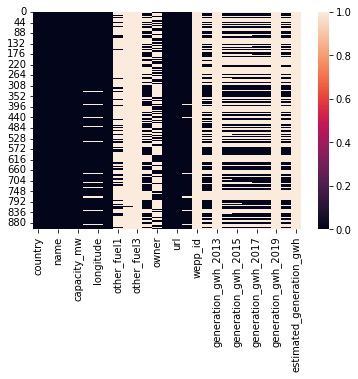

In [9]:
#To check missing values using heatmap
sns.heatmap(df_gpp.isnull())

We can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

Only 25-30% of missing value can be allowed in the dataset and greater than that need to be removed. Columns that need to be deleted are:

- other_fuel1
- other_fuel2
- other_fuel3
- owner
- wepp_id
- year_of_capacity_data
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_data_source
- estimated_generation_gwh

In [10]:
#dropping the columns having more than 30% missing values
df_gpp.drop(['other_fuel1',                 
'other_fuel2',                
'other_fuel3',                 
'commissioning_year',          
'owner',
'wepp_id',                     
'year_of_capacity_data',       
'generation_gwh_2013',         
'generation_gwh_2014',         
'generation_gwh_2015',         
'generation_gwh_2016',         
'generation_gwh_2017',
'generation_gwh_2018',
'generation_gwh_2019',
'generation_data_source',      
'estimated_generation_gwh',
'url'],axis=1,inplace=True)

In [11]:
#checking the dimension of the dataset after dropping the columns
df_gpp.shape

(907, 10)

In [12]:
#checking the null values after dropping some columns
df_gpp.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [13]:
#checking unique values
df_gpp.nunique()

country                 1
country_long            1
name                  907
gppd_idnr             907
capacity_mw           361
latitude              836
longitude             827
primary_fuel            8
source                191
geolocation_source      3
dtype: int64

In [14]:
# getting list of object data type column names
object_datatype = []
for x in df_gpp.dtypes.index:
    if df_gpp.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Datatype Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df_gpp.dtypes.index:
    if df_gpp.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Datatype Columns are: ", float_datatype)

Object Datatype Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'geolocation_source']
Float Datatype Columns are:  ['capacity_mw', 'latitude', 'longitude']


In [15]:
# filling missing data for continous values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_gpp['latitude']=imp.fit_transform(df_gpp['latitude'].values.reshape(-1,1))
df_gpp['longitude']=imp.fit_transform(df_gpp['longitude'].values.reshape(-1,1))

# filling missing data for categorical values
df_gpp['geolocation_source']=df_gpp['geolocation_source'].fillna(df_gpp['geolocation_source'].mode()[0])

In [16]:
df_gpp.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

<AxesSubplot:>

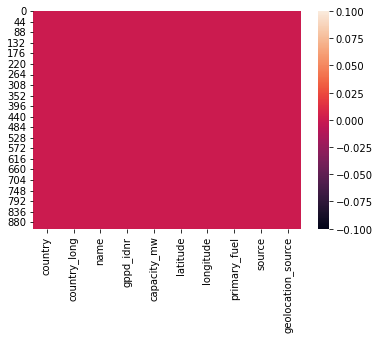

In [17]:
#visualizing the null count with heatmap
sns.heatmap(df_gpp.isnull())

We can see that there is no missing values in the dataset.

In [18]:
df_gpp['gppd_idnr']=df_gpp['gppd_idnr'].str[:3]
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
903,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
904,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI
905,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [19]:
#lets do statistics testing on columns name and source
mod = ols('capacity_mw ~ source', data=df_gpp).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
source,6.014941e+07,190.0,0.887779,0.840475
Residual,2.553206e+08,716.0,NaN,NaN


We are getting p-value greater than 0.05 so we will drop these columns as they have no effect on target column.

# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

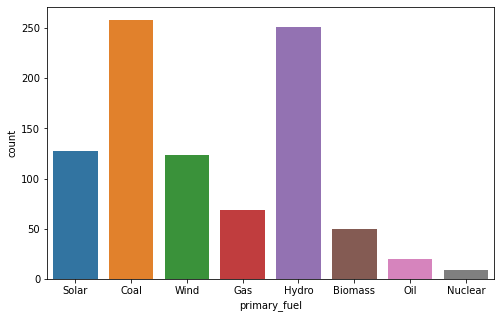

In [20]:
#checking countplot for our target column

plt.figure(figsize=(8,5))
sns.countplot(x='primary_fuel', data=df_gpp)
plt.show()

In the above plot, we can see that the highest number of values have been covered by coal and hydro fuel and, then comes solar and wind. We also see that gas, biomass, oil and nuclear have very low data counts.

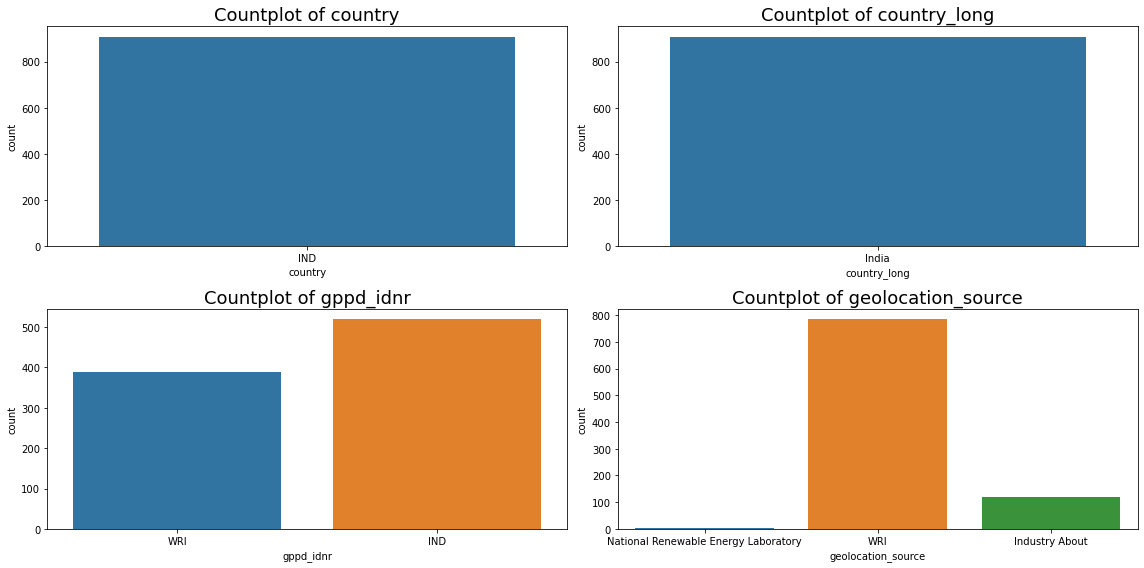

In [21]:
#checking countplot for the feature columns
col=['country','country_long','gppd_idnr','geolocation_source']

plt.figure(figsize=(16,8))
for i in range(0,len(col)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_gpp[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=18)
    plt.tight_layout()

- From 'country' and 'country_long' countplots, we can say that there is only one value so we can drop these column.
- From 'gppd_idnr', we see that WRI has Count of 400 and IND has count of 500 i.e., count of IND is greater than WRI.
- From 'geolocation_source', we can see that WRI has almost 800 Count that is highest and National Renewable energy laboratory is very less which is quite negligible, and Industry About has around 100 counts.

Text(0.5, 1.0, 'Distribution of longitude')

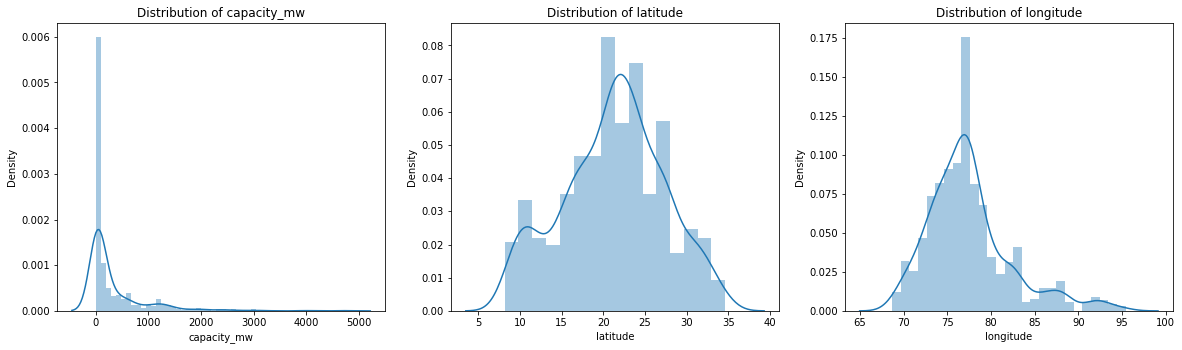

In [22]:
#checking distribution plot for the continuous values columns
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.distplot(df_gpp['capacity_mw'])
plt.title("Distribution of capacity_mw")
plt.subplot(3,3,2)
sns.distplot(df_gpp['latitude'])
plt.title("Distribution of latitude")
plt.subplot(3,3,3)
sns.distplot(df_gpp['longitude'])
plt.title("Distribution of longitude")

1 From distribution of capacity_mw, we can say it has high left peak

2 From latitude, we see that it is has some data point only in middle so it has middle peak only

3 From distribution of longitude,we see that it has right peak only

All the above distribution plots are not normally distributed, it indicates that data is skewed which will be required to be treated accordingly.

## Bi variate analysis

Bi variate analysis works with two variables.

In [23]:
col1=['country', 'country_long', 'gppd_idnr','capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'geolocation_source']

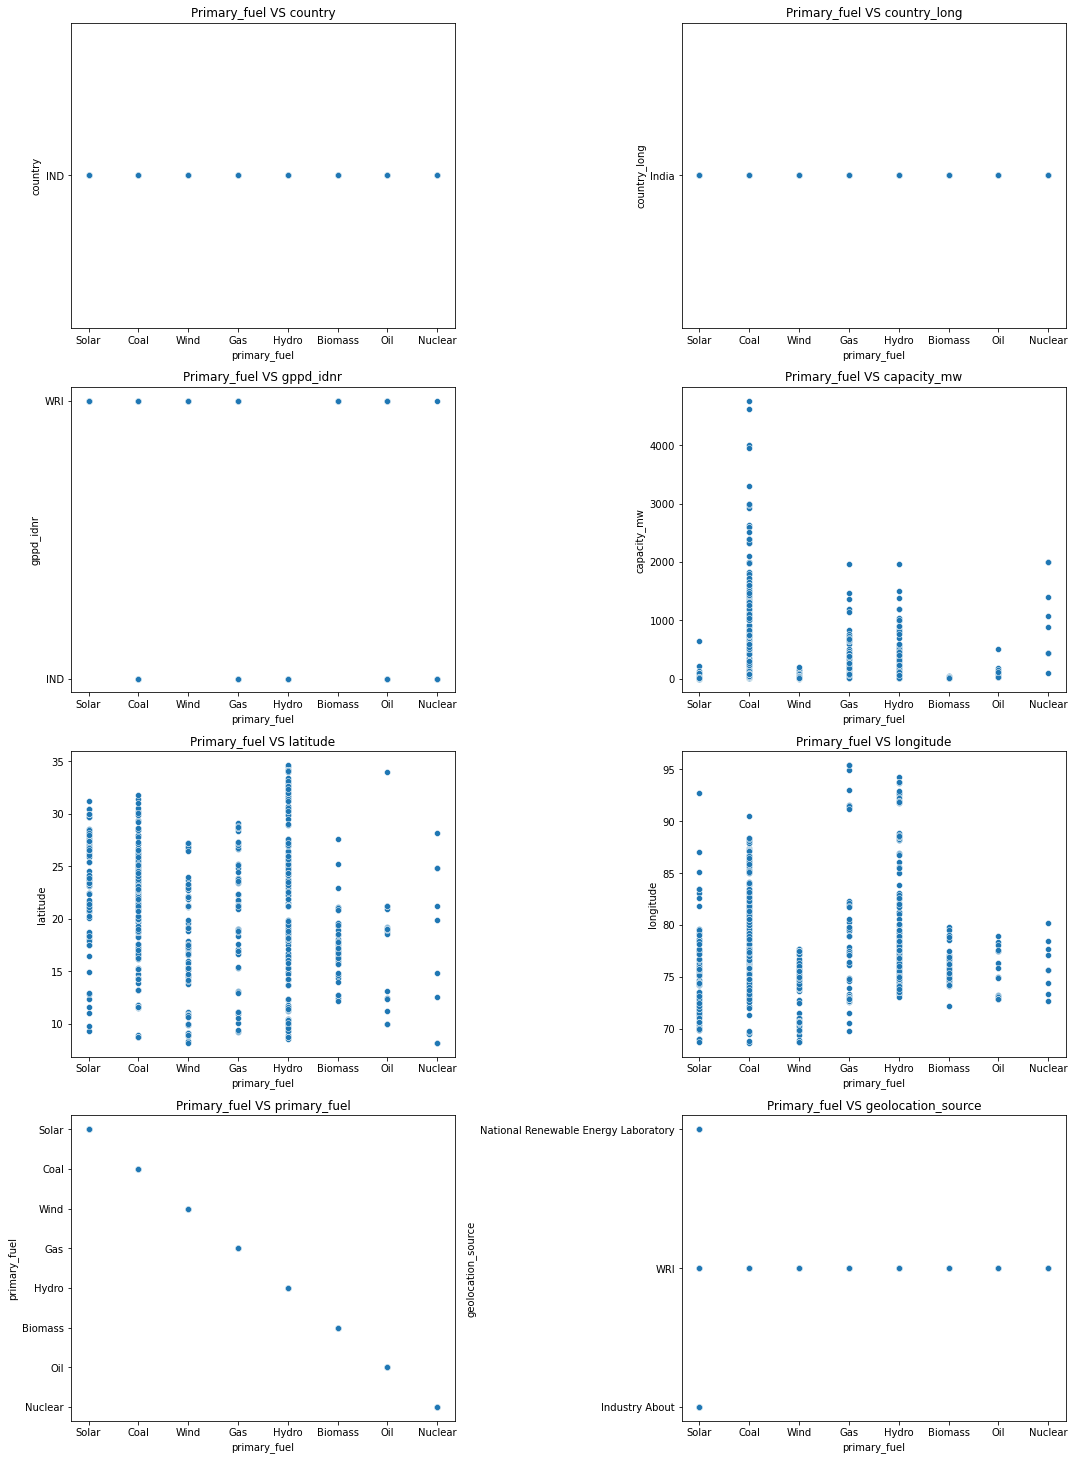

In [24]:
#checking the relationship of primary_fuel with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_gpp['primary_fuel'],y=df_gpp[col1[i]])
    plt.title(f"Primary_fuel VS {col1[i]}")
    plt.tight_layout()

- From primary_fuel vs latitude plot, we can see that hydro fuel type is distributed across all the latitude values from 0 to 35.
- From primary_fuel vs longitude plot, we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type.
- From the primary_fuel vs capacity_mw plot, we can see that as capacity increases, consumption of coal increases.
- From then remaining plots, we see that they contain only one value so doesn't provide much information.

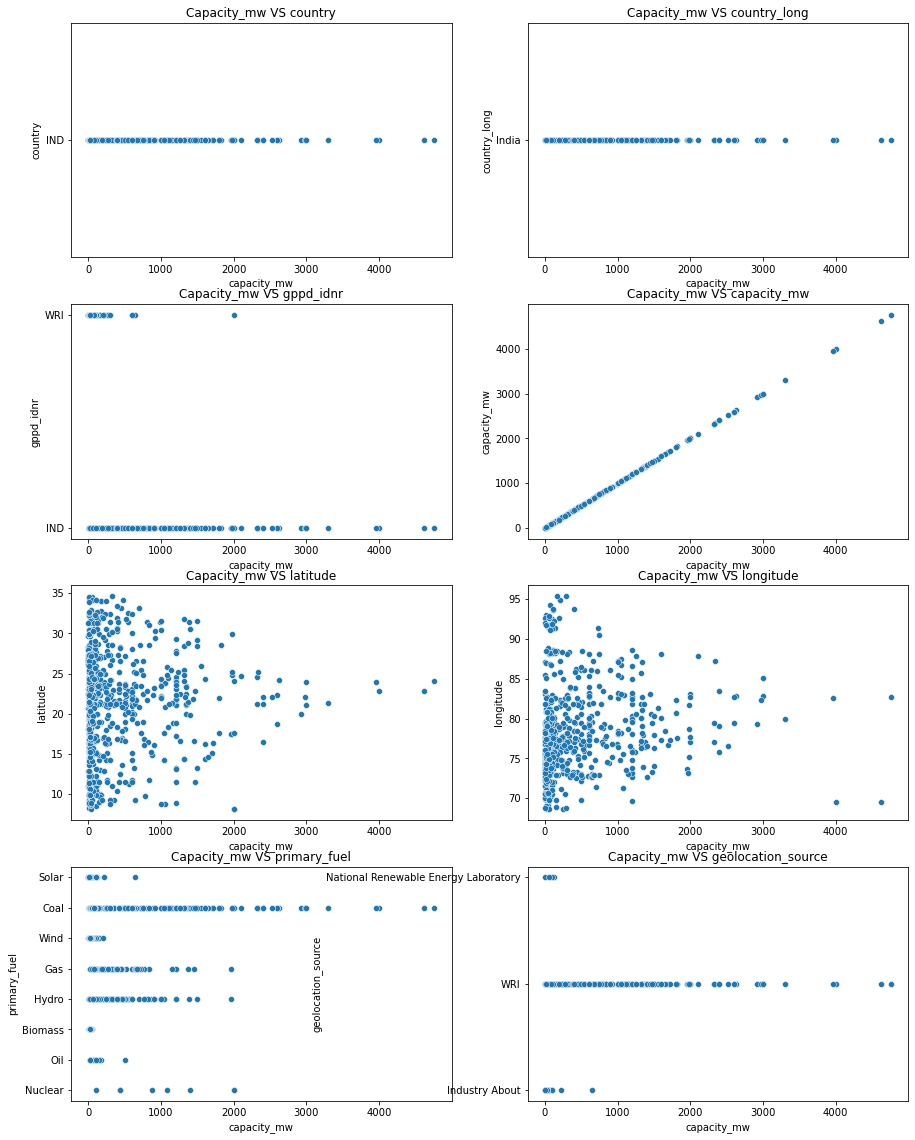

In [25]:
#checking the relationship of capacity_mw with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_gpp['capacity_mw'],y=df_gpp[col1[i]])
    plt.title(f"Capacity_mw VS {col1[i]}")

- From gppd_idnr vs capacity_mw plot, we see that as the capacity_mw is increasing the gppd_idnr is also iscreasing mostly for IND.
- From latitude vs capacity_mw plot, we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.
- From longitude vs capacity_mw plot, we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.
- In primary_fuel vs capacity_mw plot, we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.
- From geolocation_source vs capacity_mw plot, we can see that as the capacity_mw is increasing, the value of WRI(Word Resource institute) is only increasing.
- From the remaining plots, we can see that only one value is there so we cannot predict anything.

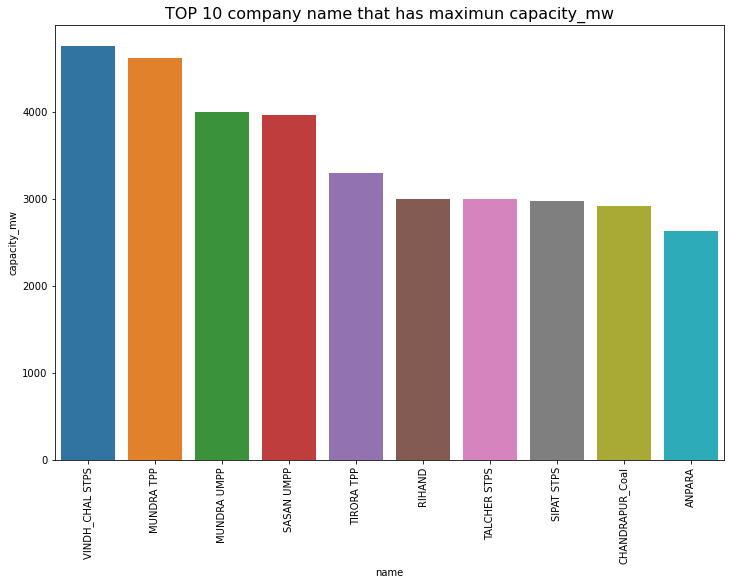

In [26]:
#plotting barplot for capacity_mw vs name
df1_gpp=df_gpp.groupby('name')['capacity_mw'].sum()
df1_gpp=df1_gpp.reset_index()
df1_gpp=df1_gpp.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1_gpp.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

We see that "vindh_chal stps" is the top most company that has the maximun electrical generating capacity.

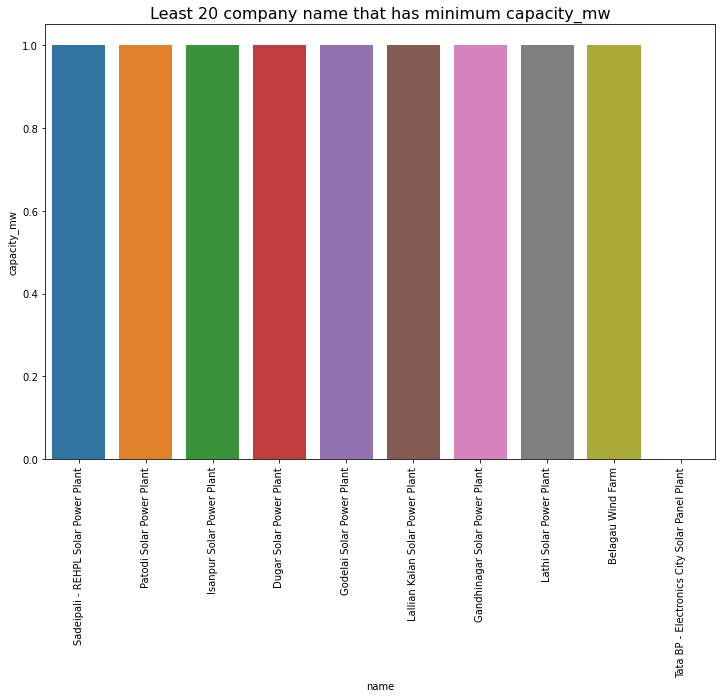

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1_gpp.tail(10))
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the plot above we see that all these 10 company produces only 1mw power.

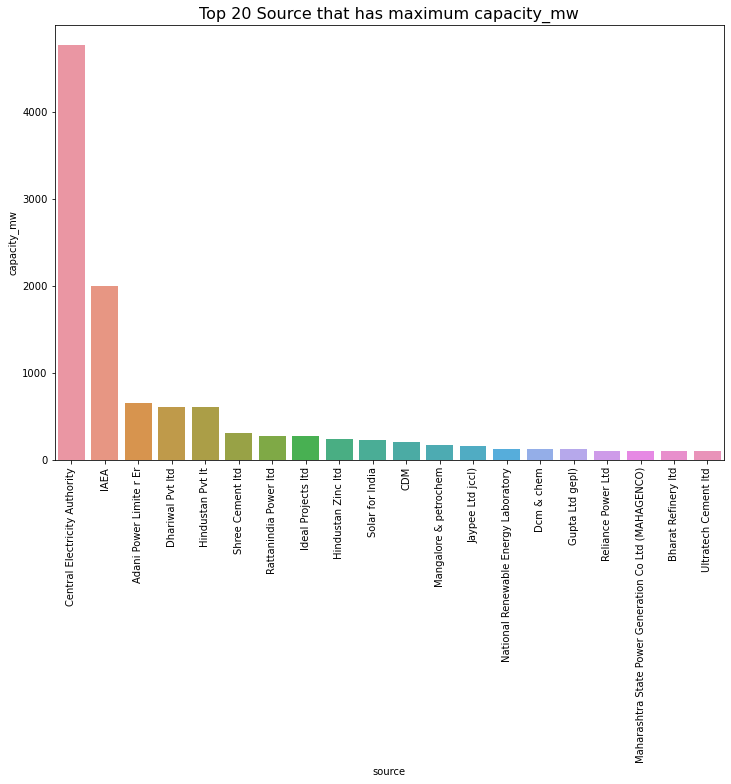

In [28]:
df2_gpp=df_gpp.groupby('source')['capacity_mw'].max()
df2_gpp=df2_gpp.reset_index()
df2_gpp=df2_gpp.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2_gpp.head(20))
plt.title("Top 20 Source that has maximum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the above graph, we see that Central Electricity Authority has the highest electrical generating capacity with more than 4000mw and Ultratech Cement ltd has the lowest value of capacity_mw.

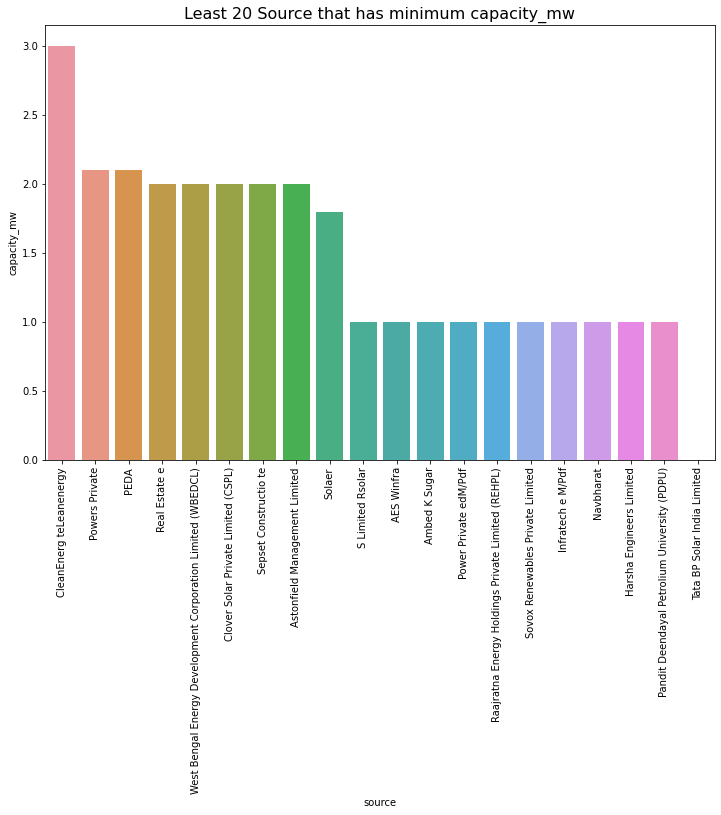

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2_gpp.tail(20))
plt.title("Least 20 Source that has minimum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

These are the least 20 sources that are having lowest capacity_mw.

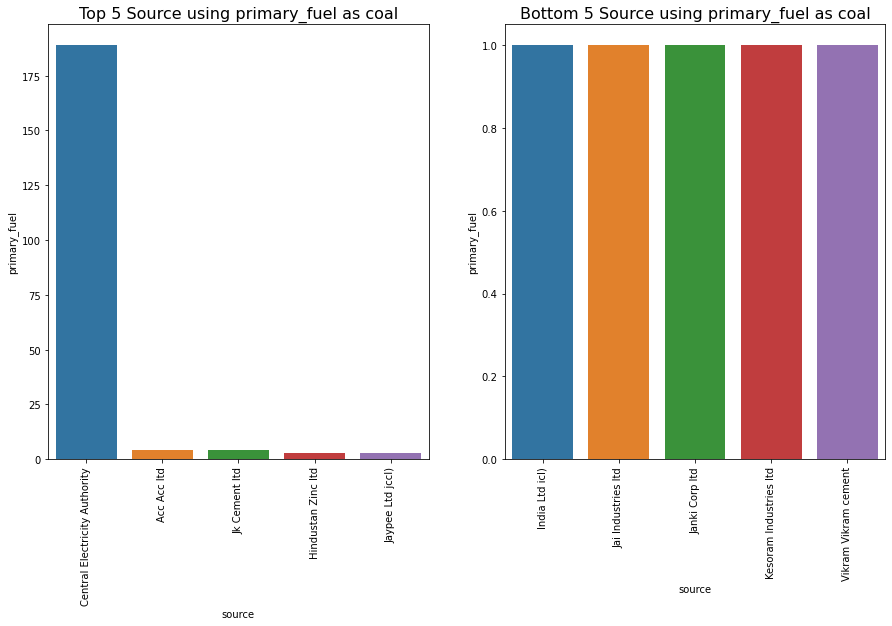

In [30]:
#checking top 5 and bottom 5 source that use coal as primary_fuel
df3_gpp=df_gpp[df_gpp['primary_fuel']=='Coal']
df4_gpp=df3_gpp.groupby('source')['primary_fuel'].count()
df4_gpp=df4_gpp.reset_index()
df4_gpp=df4_gpp.sort_values(by=('primary_fuel'),ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='source',y='primary_fuel',data=df4_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='source',y='primary_fuel',data=df4_gpp.tail(5))
plt.title("Bottom 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90)
plt.show()

- From top 5 source, we see that Central Electricity Authority use coal at very high level as compared to others.
- From bottom 5 Source, we can see that all of them use coal equally as primary_fuel.

## Feature Engineering:

In [31]:
#using reverse geocoding to extract state and city name from given latitude and longitude
import reverse_geocoder as rg
data_gpp=[]

def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return (result)
if __name__=="__main__":
    coordinates=list(zip(df_gpp['latitude'],df_gpp['longitude']))
    data1_gpp=reverseGeocode(coordinates)
    data_gpp.append(data1_gpp)

new_df_gpp=pd.DataFrame(data_gpp).transpose()

Loading formatted geocoded file...


In [32]:
df_gpp['state']=new_df_gpp[0].apply(lambda x:x.get('admin1'))

df_gpp['Country']=new_df_gpp[0].apply(lambda x:x.get('cc'))

In [33]:
data_Coal=df_gpp[df_gpp['primary_fuel']=='Coal']
data_Hydro=df_gpp[df_gpp['primary_fuel']=='Hydro']
data_Solar=df_gpp[df_gpp['primary_fuel']=='Solar']
data_Wind=df_gpp[df_gpp['primary_fuel']=='Wind']
data_Gas=df_gpp[df_gpp['primary_fuel']=='Gas']
data_Biomass=df_gpp[df_gpp['primary_fuel']=='Biomass']
data_Oil=df_gpp[df_gpp['primary_fuel']=='Oil']

In [34]:
df5_gpp=data_Coal.groupby('source')['primary_fuel'].count()
df5_gpp=df5_gpp.reset_index()
df5_gpp=df5_gpp.sort_values(by=('primary_fuel'),ascending=False)

df6_gpp=data_Hydro.groupby('source')['primary_fuel'].count()
df6_gpp=df6_gpp.reset_index()
df6_gpp=df6_gpp.sort_values(by=('primary_fuel'),ascending=False)

df7_gpp=data_Solar.groupby('source')['primary_fuel'].count()
df7_gpp=df7_gpp.reset_index()
df7_gpp=df7_gpp.sort_values(by=('primary_fuel'),ascending=False)

df8_gpp=data_Wind.groupby('source')['primary_fuel'].count()
df8_gpp=df8_gpp.reset_index()
df8_gpp=df8_gpp.sort_values(by=('primary_fuel'),ascending=False)

df9_gpp=data_Gas.groupby('source')['primary_fuel'].count()
df9_gpp=df9_gpp.reset_index()
df9_gpp=df9_gpp.sort_values(by=('primary_fuel'),ascending=False)

df10_gpp=data_Biomass.groupby('source')['primary_fuel'].count()
df10_gpp=df10_gpp.reset_index()
df10_gpp=df10_gpp.sort_values(by=('primary_fuel'),ascending=False)

df11_gpp=data_Oil.groupby('source')['primary_fuel'].count()
df11_gpp=df11_gpp.reset_index()
df11_gpp=df11_gpp.sort_values(by=('primary_fuel'),ascending=False)

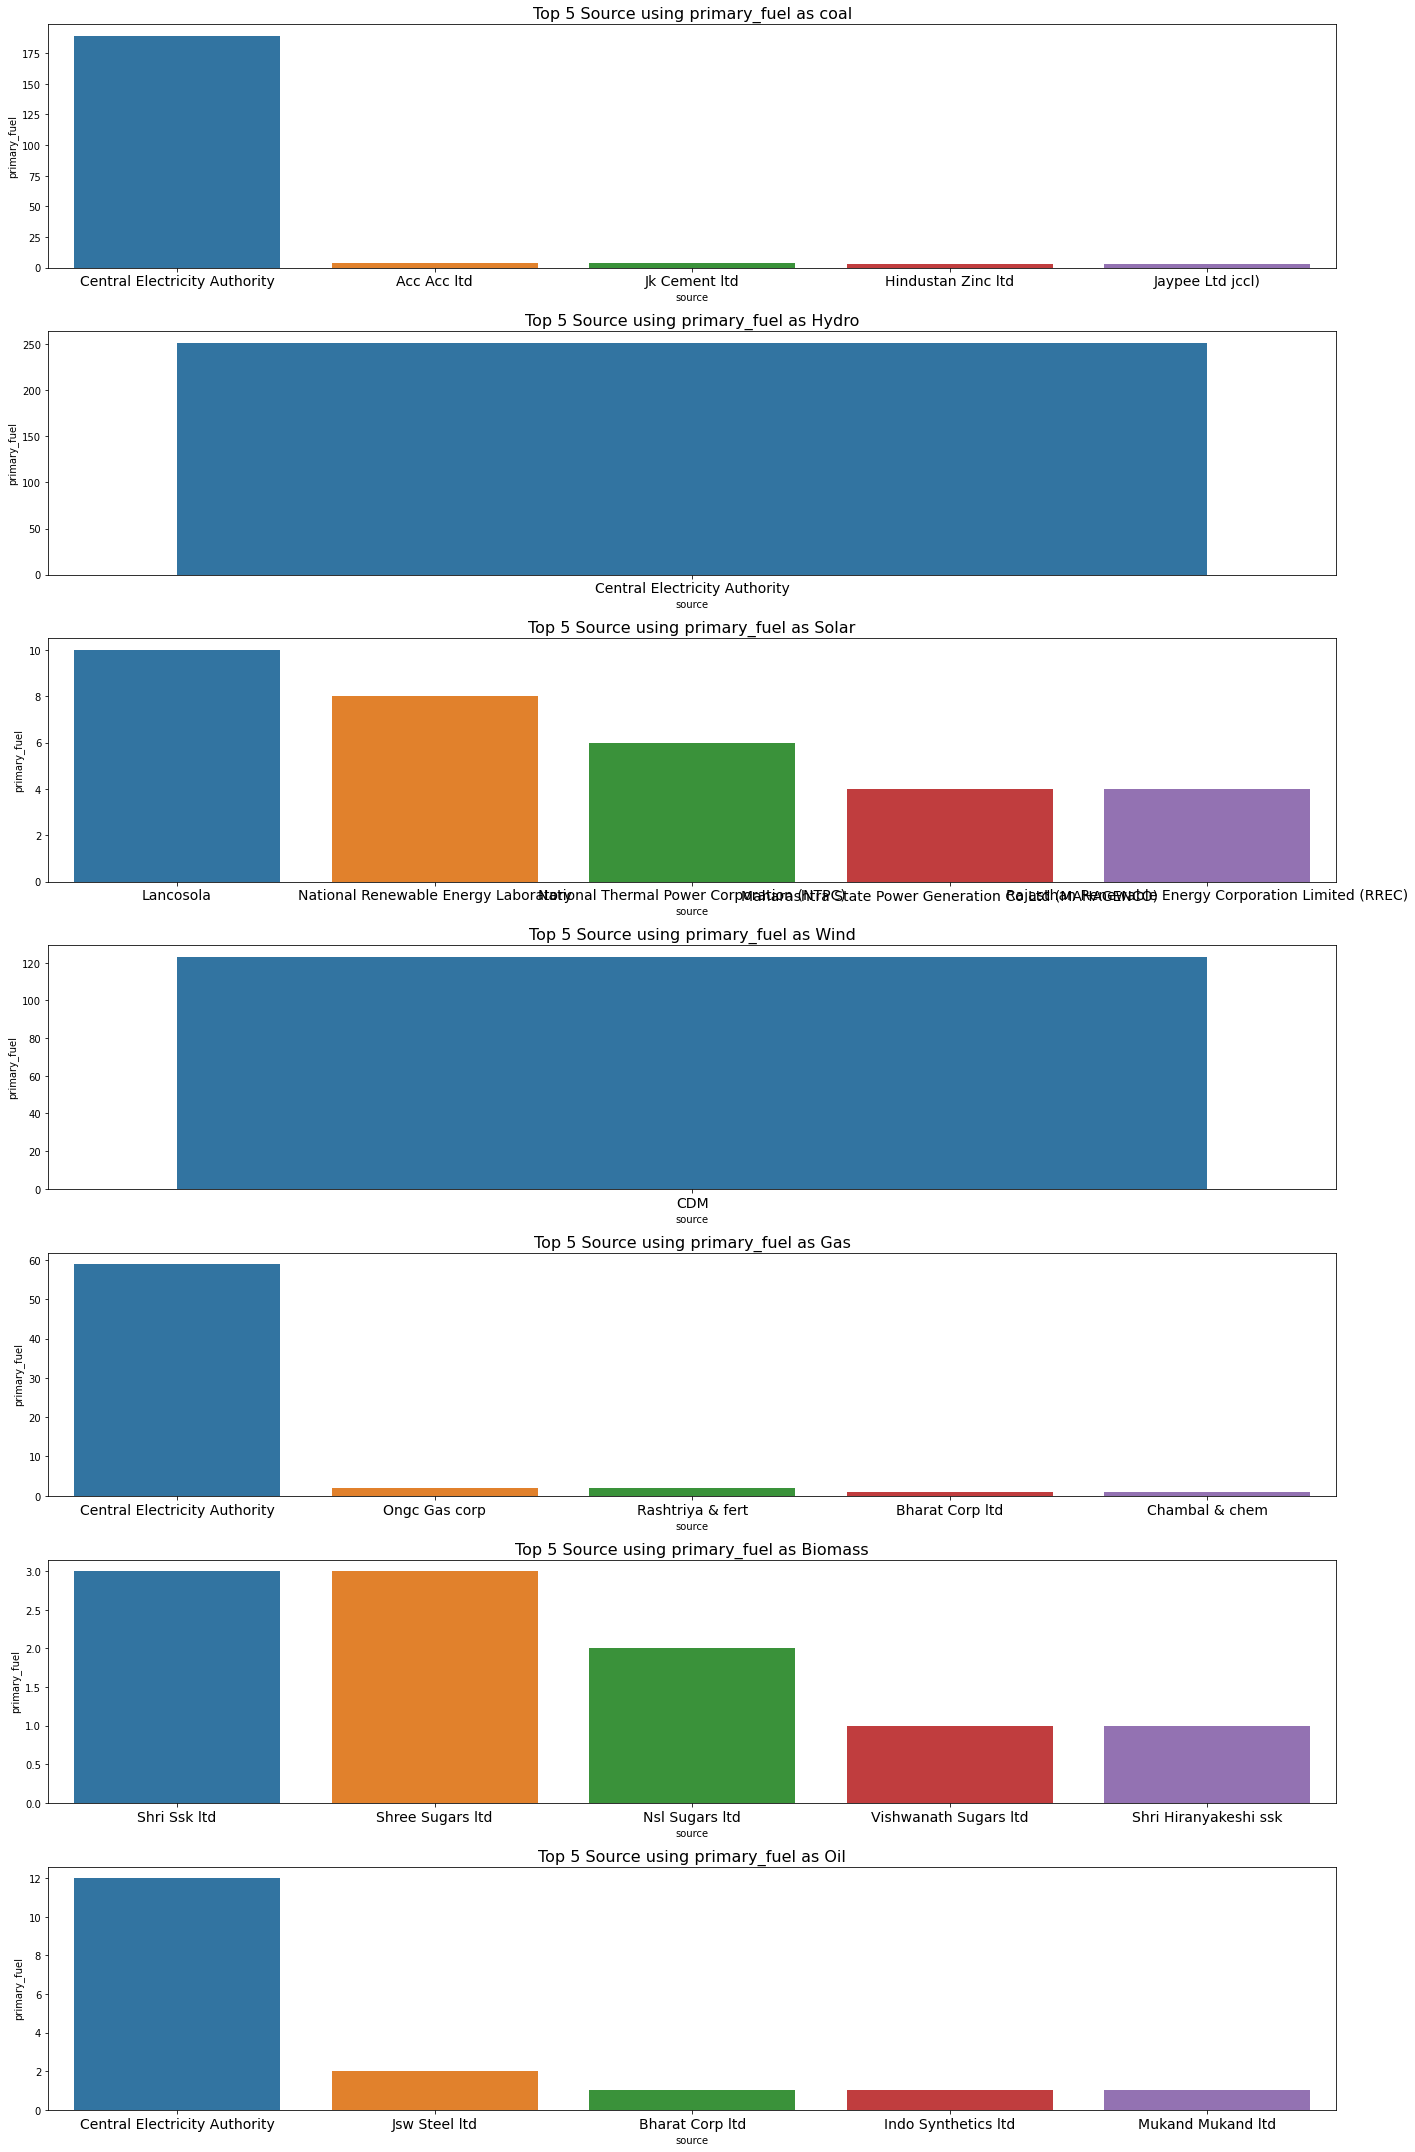

In [35]:
#checking the top 5 source that use different type of fuels using barplot
plt.figure(figsize=(20,30))
plt.subplot(7,1,1)
sns.barplot(x='source',y='primary_fuel',data=df5_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,2)
sns.barplot(x='source',y='primary_fuel',data=df6_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Hydro",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,3)
sns.barplot(x='source',y='primary_fuel',data=df7_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Solar",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,4)
sns.barplot(x='source',y='primary_fuel',data=df8_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Wind",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,5)
sns.barplot(x='source',y='primary_fuel',data=df9_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Gas",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,6)
sns.barplot(x='source',y='primary_fuel',data=df10_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Biomass",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,7)
sns.barplot(x='source',y='primary_fuel',data=df11_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Oil",fontsize=16)
plt.xticks(fontsize=14)
plt.tight_layout()

1. Top 5 source using coal as primary fuel are    
- Central Electricity Authority
- Acc Acc ltd
- Jk Cement ltd
- Hindustan Zinc ltd
- Jaypee Ltd jccl

2. Top 5 Source using primary_fuel as Solar are
- Lancosola
- National Renewable Energy Laboratory
- National Thermal Power Corporation (NTPC)
- Maharashtra State Power Generation Co Ltd
- Rajasthan Renewable Energy Corporation Limited

3. Top 5 Source using primary_fuel as Gas are
- Central Electricity Authority
- Ongc Gas corp
- Rashtriya & fert
- Bharat Corp ltd
- Chambal & chem

4. Top 5 Source using primary_fuel as Biomass are
- Shri Ssk ltd
- Shree Sugars ltd
- Nsl Sugars ltd
- Vishwanath Sugars ltd
- Shri Hiranyakeshi ssk

5. Top 5 Source using primary_fuel as Oil are
- Central Electricity Authority
- Jsw Steel ltd
- Bharat Corp ltd
- Indo Synthetics ltd
- Mukand Mukand ltd

<AxesSubplot:ylabel='capacity_mw'>

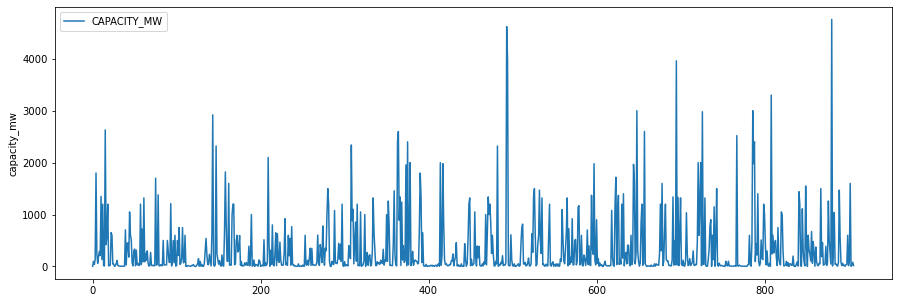

In [36]:
#checking lineplot for capacity_mw
plt.figure(figsize=(15,5))
sns.lineplot(data=df_gpp['capacity_mw'],label='CAPACITY_MW')

We see that the flow in capacity is not increasing continuously with time.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arunachal Pradesh'),
  Text(1, 0, 'Western Region'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Nagaland'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Samchi'),
  Text(8, 0, 'Pondicherry'),
  Text(9, 0, 'Andaman and Nicobar Islands')])

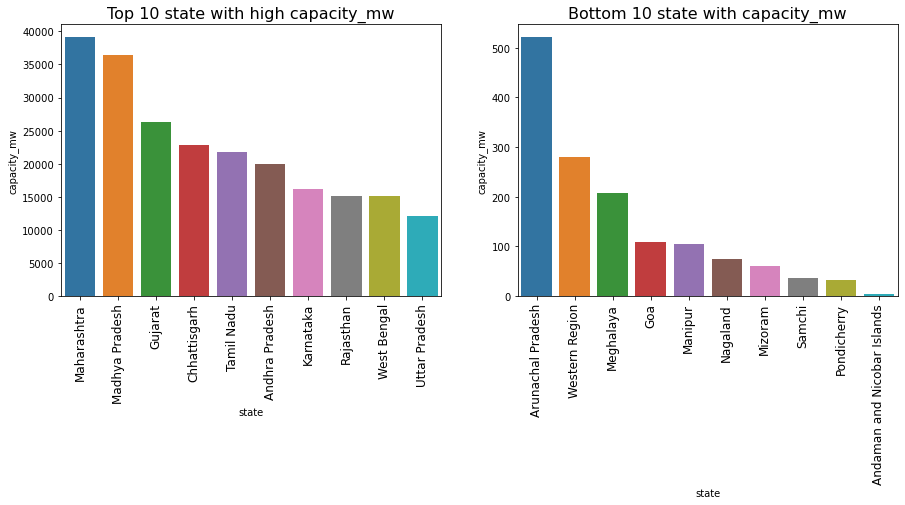

In [37]:
#checking top 10 state having high capacity_mw 
data_state=df_gpp.groupby('state')['capacity_mw'].sum()
data_state=data_state.reset_index()
data_state=data_state.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='capacity_mw',data=data_state.head(10))
plt.title("Top 10 state with high capacity_mw",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='state',y='capacity_mw',data=data_state.tail(10))
plt.title("Bottom 10 state with capacity_mw",fontsize=16)
plt.xticks(rotation=90,fontsize=12)

In [38]:
#Checking top 5 state using various kinds of primary_fuel
df12_gpp=data_Coal.groupby('state')['primary_fuel'].count()
df12_gpp=df12_gpp.reset_index()
df12_gpp=df12_gpp.sort_values(by=('primary_fuel'),ascending=False)

df13_gpp=data_Hydro.groupby('state')['primary_fuel'].count()
df13_gpp=df13_gpp.reset_index()
df13_gpp=df13_gpp.sort_values(by=('primary_fuel'),ascending=False)

df14_gpp=data_Solar.groupby('state')['primary_fuel'].count()
df14_gpp=df14_gpp.reset_index()
df14_gpp=df14_gpp.sort_values(by=('primary_fuel'),ascending=False)

df15_gpp=data_Wind.groupby('state')['primary_fuel'].count()
df15_gpp=df15_gpp.reset_index()
df15_gpp=df15_gpp.sort_values(by=('primary_fuel'),ascending=False)

df16_gpp=data_Gas.groupby('state')['primary_fuel'].count()
df16_gpp=df16_gpp.reset_index()
df16_gpp=df16_gpp.sort_values(by=('primary_fuel'),ascending=False)

df17_gpp=data_Biomass.groupby('state')['primary_fuel'].count()
df17_gpp=df17_gpp.reset_index()
df17_gpp=df17_gpp.sort_values(by=('primary_fuel'),ascending=False)

df18_gpp=data_Oil.groupby('state')['primary_fuel'].count()
df18_gpp=df18_gpp.reset_index()
df18_gpp=df18_gpp.sort_values(by=('primary_fuel'),ascending=False)

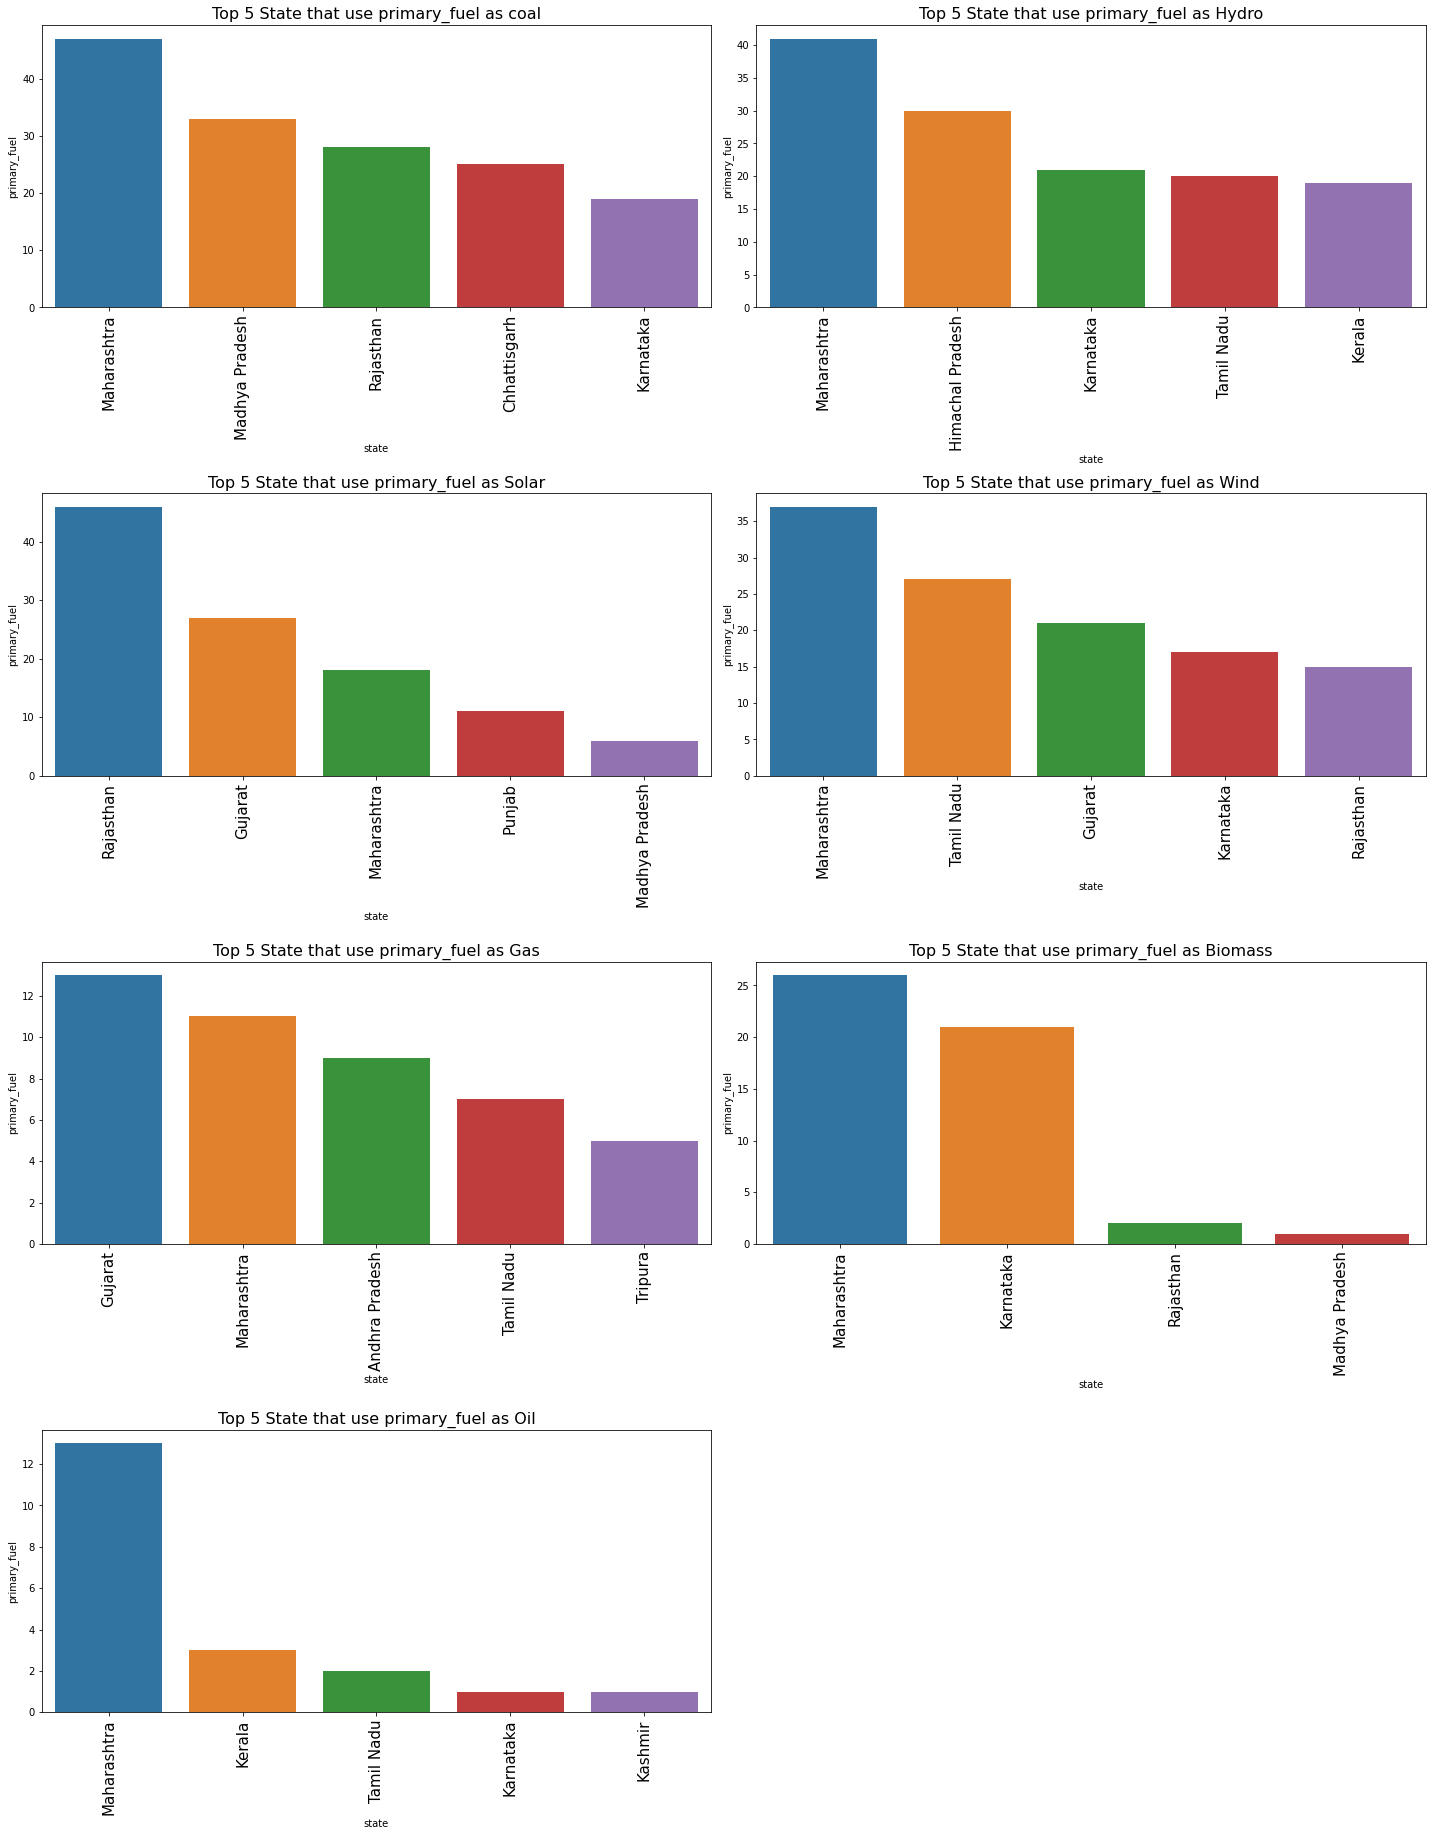

In [39]:
plt.figure(figsize=(20,50))
plt.subplot(8,2,1)
sns.barplot(x='state',y='primary_fuel',data=df12_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,2)
sns.barplot(x='state',y='primary_fuel',data=df13_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Hydro",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,3)
sns.barplot(x='state',y='primary_fuel',data=df14_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Solar",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,4)
sns.barplot(x='state',y='primary_fuel',data=df15_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Wind",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,5)
sns.barplot(x='state',y='primary_fuel',data=df16_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Gas",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,6)
sns.barplot(x='state',y='primary_fuel',data=df17_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Biomass",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,7)
sns.barplot(x='state',y='primary_fuel',data=df18_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Oil",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()

Let's create a heatmap to visualize the data better.

In [40]:
#checking the country value counts
df_gpp['Country'].value_counts()

IN    905
NP      1
BT      1
Name: Country, dtype: int64

In [41]:
#replacing country names with their full name
df_gpp['Country']=df_gpp['Country'].replace({'IN':'INDIA','GH':'GHANA','NP':'NEPAL','BT':'BHUTAN'})

In [42]:
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,INDIA
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,INDIA
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,INDIA
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,INDIA
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,INDIA
903,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,INDIA
904,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,INDIA
905,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,INDIA


In [43]:
#dropping the columns country, country_long, name, source as they dont help much in our model building
df_gpp.drop(['country','country_long','name','source'],axis=1,inplace=True)

In [44]:
df_gpp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,Rajasthan,INDIA
1,WRI,98.0,24.7663,74.6090,Coal,WRI,Rajasthan,INDIA
2,WRI,39.2,21.9038,69.3732,Wind,WRI,Gujarat,INDIA
3,IND,135.0,23.8712,91.3602,Gas,WRI,Tripura,INDIA
4,IND,1800.0,21.9603,82.4091,Coal,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...
902,IND,1600.0,16.2949,77.3568,Coal,WRI,Karnataka,INDIA
903,WRI,3.0,12.8932,78.1654,Solar,Industry About,Karnataka,INDIA
904,WRI,25.5,15.2758,75.5811,Wind,WRI,Karnataka,INDIA
905,WRI,80.0,24.3500,73.7477,Coal,WRI,Rajasthan,INDIA


## Scaling the data

In [45]:
#using ordinal encoder because most of the columns are having order
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

def ordinal_transform(df_gpp,column):
    df_gpp[column]=oe.fit_transform(df_gpp[column])
    return df_gpp

In [46]:
print(df_gpp['primary_fuel'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


In [47]:
print(df_gpp['geolocation_source'].unique())

['National Renewable Energy Laboratory' 'WRI' 'Industry About']


In [48]:
print(df_gpp['state'].unique())

['Rajasthan' 'Gujarat' 'Tripura' 'Chhattisgarh' 'Tamil Nadu'
 'Himachal Pradesh' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Uttar Pradesh' 'Andhra Pradesh' 'Kashmir' 'West Bengal' 'Odisha' 'Bihar'
 'Jharkhand' 'Assam' 'Kerala' 'Uttarakhand' 'Sikkim' 'Western Region'
 'Nagaland' 'Haryana' 'Andaman and Nicobar Islands' 'NCT' 'Samchi'
 'Telangana' 'Pondicherry' 'Meghalaya' 'Manipur' 'Arunachal Pradesh' 'Goa'
 'Mizoram']


In [49]:
print(df_gpp['Country'].unique())

['INDIA' 'NEPAL' 'BHUTAN']


In [50]:
print(df_gpp['gppd_idnr'].unique())

['WRI' 'IND']


In [51]:
df_gpp=ordinal_transform(df_gpp,['primary_fuel','geolocation_source','Country','gppd_idnr'])

In [52]:
df_gpp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,1.0,2.5,28.1839,73.2407,6.0,1.0,Rajasthan,1.0
1,1.0,98.0,24.7663,74.6090,1.0,2.0,Rajasthan,1.0
2,1.0,39.2,21.9038,69.3732,7.0,2.0,Gujarat,1.0
3,0.0,135.0,23.8712,91.3602,2.0,2.0,Tripura,1.0
4,0.0,1800.0,21.9603,82.4091,1.0,2.0,Chhattisgarh,1.0
...,...,...,...,...,...,...,...,...
902,0.0,1600.0,16.2949,77.3568,1.0,2.0,Karnataka,1.0
903,1.0,3.0,12.8932,78.1654,6.0,0.0,Karnataka,1.0
904,1.0,25.5,15.2758,75.5811,7.0,2.0,Karnataka,1.0
905,1.0,80.0,24.3500,73.7477,1.0,2.0,Rajasthan,1.0


In [53]:
#using labelencoder to transform non-numerical state labels to numerical labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_gpp['state']=le.fit_transform(df_gpp['state'])

In [54]:
df_gpp['Capacity_as_per_fuel_type']=df_gpp['capacity_mw']/df_gpp['primary_fuel']#Adding one more feature we can find out the capacity as per the fuel type
df_gpp['Capacity_as_per_fuel_type']=df_gpp['Capacity_as_per_fuel_type'].replace([np.inf,-np.inf],np.nan) #it contains nan and inf value so removing them
df_gpp['Capacity_as_per_fuel_type']=df_gpp['Capacity_as_per_fuel_type'].fillna(0)

In [55]:
print(df_gpp['primary_fuel'].unique())

[6. 1. 7. 2. 3. 0. 5. 4.]


In [56]:
print(df_gpp['geolocation_source'].unique())

[1. 2. 0.]


In [57]:
print(df_gpp['state'].unique())

[24  7 29  5 27  9 11 14 15 23 30  1 12 32 21  4 10  3 13 31 26 33 20  8
  0 19 25 28 22 17 16  2  6 18]


In [58]:
print(df_gpp['Country'].unique())

[1. 2. 0.]


In [59]:
print(df_gpp['gppd_idnr'].unique())

[1. 0.]


## Multivariate Analysis:

In [60]:
#Checking Correlation
df_gpp.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country,Capacity_as_per_fuel_type
gppd_idnr,1.000000e+00,-0.417896,-0.079234,-0.427398,5.005583e-01,-4.559635e-01,0.035170,-1.253222e-16,-0.368133
capacity_mw,-4.178962e-01,1.000000,0.050984,0.195882,-3.803953e-01,2.048653e-01,-0.053635,9.713949e-03,0.964942
latitude,-7.923391e-02,0.050984,1.000000,0.036362,-1.020447e-02,-1.842751e-01,0.042591,1.100803e-02,0.046770
longitude,-4.273975e-01,0.195882,0.036362,1.000000,-3.479480e-01,2.523426e-01,0.090192,-4.052768e-02,0.203949
primary_fuel,5.005583e-01,-0.380395,-0.010204,-0.347948,1.000000e+00,-4.832168e-01,0.078989,2.152643e-16,-0.394430
geolocation_source,-4.559635e-01,0.204865,-0.184275,0.252343,-4.832168e-01,1.000000e+00,-0.078410,1.913766e-16,0.178149
state,3.516962e-02,-0.053635,0.042591,0.090192,7.898939e-02,-7.841028e-02,1.000000,2.300195e-02,-0.048927
Country,-1.253222e-16,0.009714,0.011008,-0.040528,2.152643e-16,1.913766e-16,0.023002,1.000000e+00,0.003337
Capacity_as_per_fuel_type,-3.681326e-01,0.964942,0.046770,0.203949,-3.944300e-01,1.781493e-01,-0.048927,3.337373e-03,1.000000


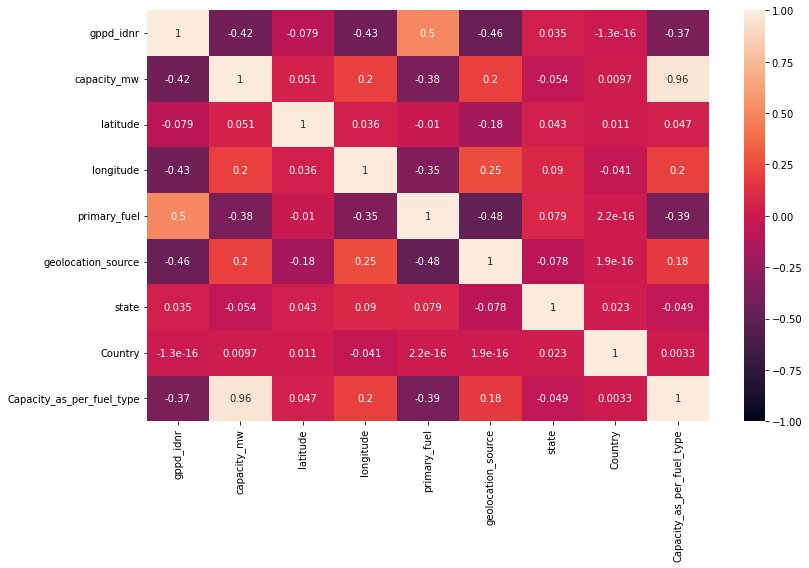

In [61]:
df_correlation = df_gpp.corr()

plt.figure(figsize = (12,8))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

We see that we have some columns that have good positive correlation and some have negative correlation which is good for model building.

## Preparing Data for Regression Model:


In [62]:
x=df_gpp.drop(['capacity_mw'],axis=1)
y=df_gpp['capacity_mw']

In [63]:
x

,gppd_idnr,latitude,longitude,primary_fuel,geolocation_source,state,Country,Capacity_as_per_fuel_type
0,1.0,28.1839,73.2407,6.0,1.0,24,1.0,0.416667
1,1.0,24.7663,74.6090,1.0,2.0,24,1.0,98.000000
2,1.0,21.9038,69.3732,7.0,2.0,7,1.0,5.600000
3,0.0,23.8712,91.3602,2.0,2.0,29,1.0,67.500000
4,0.0,21.9603,82.4091,1.0,2.0,5,1.0,1800.000000
...,...,...,...,...,...,...,...,...
902,0.0,16.2949,77.3568,1.0,2.0,11,1.0,1600.000000
903,1.0,12.8932,78.1654,6.0,0.0,11,1.0,0.500000
904,1.0,15.2758,75.5811,7.0,2.0,11,1.0,3.642857
905,1.0,24.3500,73.7477,1.0,2.0,24,1.0,80.000000


In [64]:
y_new=np.log(y)
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

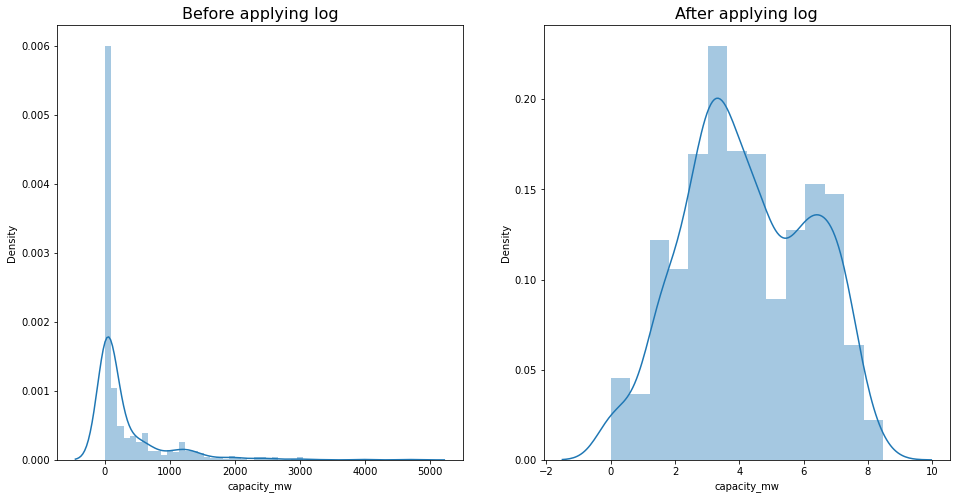

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=16)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=16)

The target column 'capacity_mw' is having very large values so we did log transformation and secondly, the target column is also right skewed so according to rule if our target column is right skewed only then we can apply log tansformation on target column. At the time of prediction, we will reverse it though.

## Feature Scaling: 

In [66]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Checking skewness:

In [67]:
x_new.skew()

gppd_idnr                    0.292409
latitude                    -0.149698
longitude                    1.141881
primary_fuel                 0.472251
geolocation_source          -2.159841
state                        0.198231
Country                      0.000000
Capacity_as_per_fuel_type    3.554465
dtype: float64

## Removing skewness:

In [68]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [69]:
#checking skewness after removal
x_new.skew()

gppd_idnr                    2.924091e-01
latitude                     1.336998e-02
longitude                   -3.076170e-02
primary_fuel                 8.966148e-02
geolocation_source          -2.132134e+00
state                       -3.068790e-02
Country                     -6.999318e-07
Capacity_as_per_fuel_type    9.690404e-01
dtype: float64

In [70]:
#we can remove "geolocation_source" and "Country" columns as they are still having skewness after removing the skewness
x=df_gpp.drop(['Country', 'geolocation_source'], axis=1)
x

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,state,Capacity_as_per_fuel_type
0,1.0,2.5,28.1839,73.2407,6.0,24,0.416667
1,1.0,98.0,24.7663,74.6090,1.0,24,98.000000
2,1.0,39.2,21.9038,69.3732,7.0,7,5.600000
3,0.0,135.0,23.8712,91.3602,2.0,29,67.500000
4,0.0,1800.0,21.9603,82.4091,1.0,5,1800.000000
...,...,...,...,...,...,...,...
902,0.0,1600.0,16.2949,77.3568,1.0,11,1600.000000
903,1.0,3.0,12.8932,78.1654,6.0,11,0.500000
904,1.0,25.5,15.2758,75.5811,7.0,11,3.642857
905,1.0,80.0,24.3500,73.7477,1.0,24,80.000000


## Remarks:

Here we have not checked outliers because every column is categorical except for the target column so there is no meaning in checking outliers. Even in longitude and latitude, it is useless to check outliers as it represents address only.

## Training Multiple models:

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [72]:
models_regression={
    "LinearRegression":LinearRegression(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "SupportVectorRegression":SVR()
}

## Finding best Random State

In [73]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    lr_= LinearRegression()
    lr_.fit(x_train, y_train)
    pred_lr = lr_.predict(x_test)
    acc=r2_score(y_test, pred_lr)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8923408558303447 on Random_state  98


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=98)

## Finding the best model:

--------------------- LinearRegression ---------------------
Score 0.8923408558303447
MEAN_SQUARE_ERROR 70300.58563946055
MEAN_ABSOLUTE_ERROR 148.94931346465455
RMSE 265.14257605948643
R2_SCORE 0.8923408558303447


MODEL PERFORMANCE CURVE


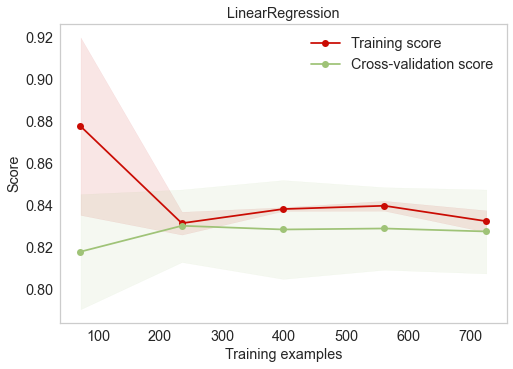

--------------------- GradientBoostingRegressor ---------------------
Score 0.9965156136872955
MEAN_SQUARE_ERROR 1704.2152963829512
MEAN_ABSOLUTE_ERROR 17.141696098954835
RMSE 41.28214258469334
R2_SCORE 0.9965156136872955


MODEL PERFORMANCE CURVE


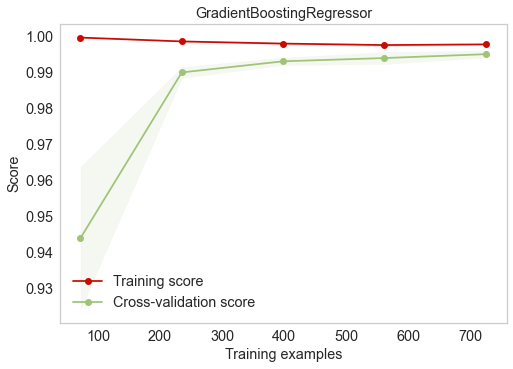

--------------------- RandomForestRegressor ---------------------
Score 0.9968203588441717
MEAN_SQUARE_ERROR 2011.2120783613818
MEAN_ABSOLUTE_ERROR 12.697965236080028
RMSE 44.84653920160821
R2_SCORE 0.9968203588441717


MODEL PERFORMANCE CURVE


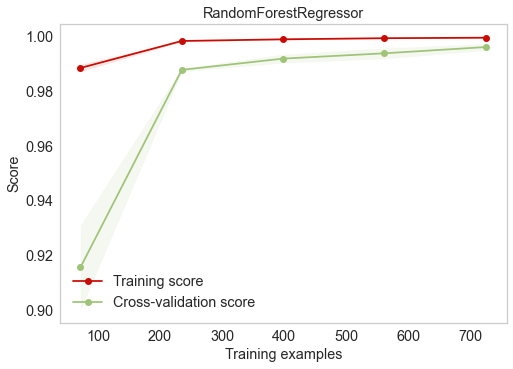

--------------------- DecisionTreeRegressor ---------------------
Score 0.9967349244466386
MEAN_SQUARE_ERROR 1872.6915381098847
MEAN_ABSOLUTE_ERROR 11.52909890109893
RMSE 43.27460615776745
R2_SCORE 0.9967349244466386


MODEL PERFORMANCE CURVE


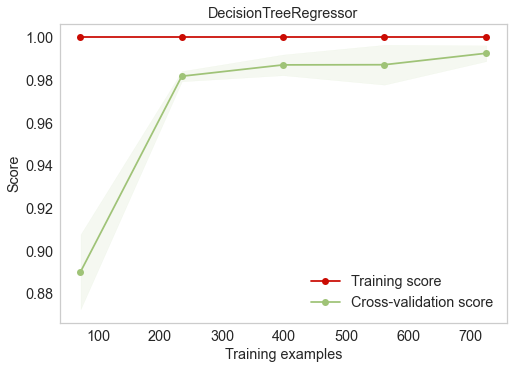

--------------------- SupportVectorRegression ---------------------
Score 0.9188403152749214
MEAN_SQUARE_ERROR 79409.93468206895
MEAN_ABSOLUTE_ERROR 115.00548237538543
RMSE 281.79768395440897
R2_SCORE 0.9188403152749214


MODEL PERFORMANCE CURVE


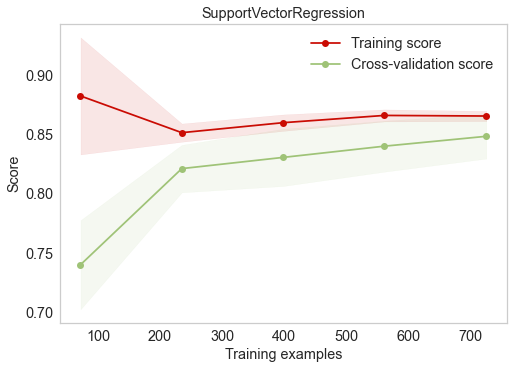

In [75]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
Rmse=[]
for name,model in models_regression.items():
    print("---------------------",name,"---------------------")
    Model.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cs=cross_val_score(model,x_new,y_new,cv=5,scoring='r2').mean()
    cvs.append(cs*100)
    mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
    Mse.append(mse)
    sc=model.score(x_test,y_test)
    score.append(sc)
    print("Score",sc)
    print("MEAN_SQUARE_ERROR",mse)
    mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
    Mae.append(mae)
    print("MEAN_ABSOLUTE_ERROR",mae)
    rmse=np.sqrt(mse)
    Rmse.append(rmse)
    print("RMSE",rmse)
    print("R2_SCORE",r2_score(y_test,y_pred))
    print("\n")
    print("MODEL PERFORMANCE CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
    plt.show()
    

In [76]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':Rmse
})

models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,LinearRegression,0.892341,82.737604,70300.585639,148.949313,265.142576
1,GradientBoostingRegressor,0.996516,99.486913,1704.215296,17.141696,41.282143
2,RandomForestRegressor,0.996820,99.602735,2011.212078,12.697965,44.846539
3,DecisionTreeRegressor,0.996735,99.274547,1872.691538,11.529099,43.274606
4,SupportVectorRegression,0.918840,84.833588,79409.934682,115.005482,281.797684


## We are selecting DecisionTreeRegressor as our final model since it has less Mae value and less RMSE.

## Hyper parameter tuning on the best ML Model:

In [77]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [80]:
params={
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt', 'log2', None],
}

In [82]:
#using the Grid Search CV method for hyper parameter tuning the best model.
grid=GridSearchCV(estimator=dtr,param_grid=params,n_jobs=-1,cv=5)

In [83]:
#training the Grid Search CV with the list of parameters it should check for best possible outcomes.
grid.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [84]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': None,
 'splitter': 'best'}

In [85]:
grid.best_score_

0.9936678006364925

## Final Model Learning Curve:

In [87]:
dtrr=DecisionTreeRegressor(
 criterion= 'absolute_error',
 max_depth= None,
 max_features= None,
 splitter= 'best')

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

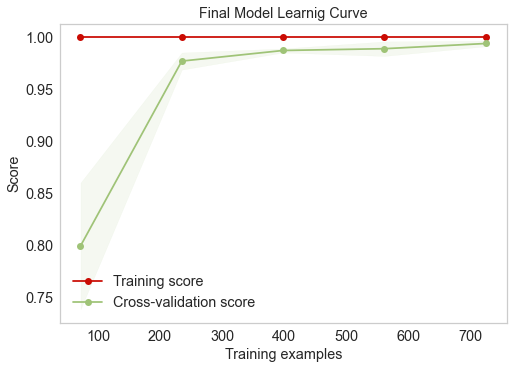

In [88]:
skplt.estimators.plot_learning_curve(dtrr,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

## Final model metrics:

In [89]:
dtrr.fit(x_train,y_train)
pred_dtrr=dtrr.predict(x_test)

print("Mean squared error",mean_squared_error(y_test,pred_dtrr))
print("Mean absolute error",mean_absolute_error(y_test,pred_dtrr))
print("R2 Score",r2_score(y_test,pred_dtrr))
print("Model score",dtrr.score(x_test,y_test))

Mean squared error 0.017330168423974144
Mean absolute error 0.062045568123737384
R2 Score 0.9958059674725058
Model score 0.9958059674725058


## The R2 score of Final Regression model is 99.58%.

## Saving and loading the model:

In [90]:
import joblib
joblib.dump(grid,"Final_model_Regression_GPP.obj")
model=joblib.load('Final_model_Regression_GPP.obj')

In [91]:
pred=model.predict(x_test)
np.exp(pred)

array([6.0000e+02, 1.3000e+02, 1.0000e+01, 2.9100e+02, 2.2500e+02,
       2.5000e+01, 8.4000e+00, 1.0500e+03, 9.0000e+00, 6.9600e+01,
       2.6000e+01, 1.0000e+00, 2.5000e+01, 1.5500e+01, 1.6500e+02,
       3.3050e+02, 5.0000e+02, 1.4700e+03, 1.2000e+03, 5.0000e+00,
       2.9000e+02, 1.0000e+00, 1.0000e+03, 3.3000e+03, 1.0000e+01,
       2.3400e+03, 3.5000e+02, 1.5000e+03, 2.6000e+01, 1.6000e+02,
       7.2000e+01, 5.0000e+00, 2.5200e+03, 3.4650e+01, 1.0000e+02,
       3.0000e+01, 1.0000e+01, 1.0500e+02, 5.5500e+02, 4.0000e+01,
       6.6000e+02, 1.0000e+02, 5.0000e+02, 2.1000e+00, 5.0000e+00,
       1.0000e+03, 2.4000e+01, 5.0000e+00, 1.2000e+02, 1.3500e+03,
       8.8800e+01, 6.5500e+02, 3.1200e+01, 4.1933e+02, 1.0250e+01,
       1.2000e+02, 2.0000e+01, 6.7200e+02, 1.5000e+01, 5.0000e+00,
       2.0000e+01, 6.0000e+02, 4.5000e+00, 1.2500e+01, 1.5000e+03,
       1.2000e+03, 7.0286e+02, 6.0000e+00, 2.5000e+01, 1.0500e+01,
       1.5000e+03, 3.0000e+01, 1.2000e+03, 4.2500e+00, 5.4000e

## Preparing Data for Classification Model:

In [92]:
x=df_gpp.drop(['primary_fuel'],axis=1)
y=df_gpp['primary_fuel']

## Checking outliers:

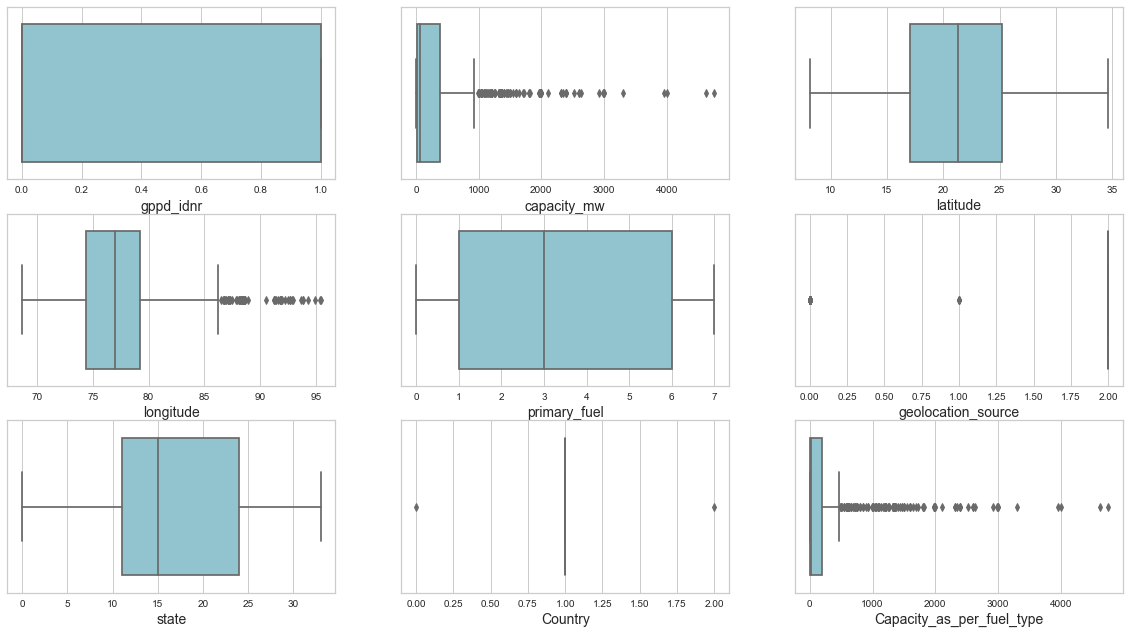

In [93]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in df_gpp:
    if plot_number <= 11: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(df_gpp[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in some columns.

## Remove outliers:

### Outlier removal using Zscore


In [94]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy

from scipy.stats import zscore

z_score= zscore(df_gpp) #Put continuous/float input variable in z-score 

abs_z_score = np.abs(z_score)

data = (abs_z_score < 3).all(axis = 1)

new_df_gpp = df_gpp[data]

print("shape before :", df_gpp.shape)
print("shape after :", new_df_gpp.shape)
print("Percentage Loss :", (df_gpp.shape[0]-new_df_gpp.shape[0])/df_gpp.shape[0])

shape before : (907, 9)
shape after : (864, 9)
Percentage Loss : 0.047409040793825796


4.741% data loss after using zscore technique

95.259% data remains

## Resolving the class imbalance issue in the target column using SMOTE method:

In [95]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=98)
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['primary_fuel'])

Text(0.5, 1.0, 'Balanced Data')

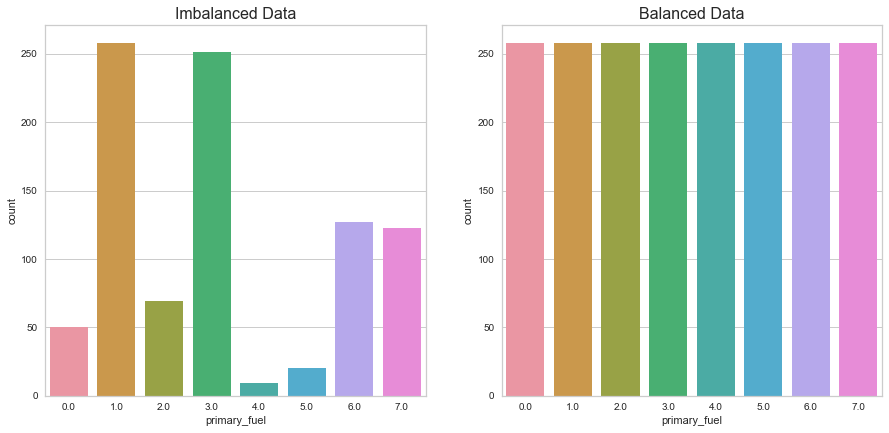

In [96]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=16)
plt.subplot(2,2,2)
sns.countplot(y_new['primary_fuel'])
plt.title("Balanced Data",fontsize=16)

Data has been balanced so now our model can predict every class with good accuracy.

In [97]:
#checking value counts of target column before balancing
df_gpp['primary_fuel'].value_counts()

1.0    258
3.0    251
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [98]:
#target coulumn value counts after balancing the data
y_new.value_counts()

primary_fuel
0.0             258
1.0             258
2.0             258
3.0             258
4.0             258
5.0             258
6.0             258
7.0             258
dtype: int64

 In the above cell, we can see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification Machine Learning model does not get biased towards one category.

## Checking skewness:

In [99]:
x_new.skew()

gppd_idnr                    0.034845
capacity_mw                  2.838027
latitude                     0.049662
longitude                    1.575272
geolocation_source          -2.350912
state                        0.171397
Country                      0.000000
Capacity_as_per_fuel_type    5.157280
dtype: float64

We see that there is skewed data present, so we will be removing it now.

In [100]:
#removing skewness
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [101]:
#checking skewness after removal
x_new.skew()

gppd_idnr                    0.009996
capacity_mw                  0.024544
latitude                    -0.043090
longitude                    0.000000
geolocation_source          -2.307907
state                       -0.067100
Country                      7.031034
Capacity_as_per_fuel_type    0.064061
dtype: float64

Not entirely, but we removed skewness upto certain level.

## Feature Scaling:

In [102]:
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Training multiple models:

In [103]:
models_classification={
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [104]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    gbc_= GradientBoostingClassifier()
    gbc_.fit(x_train, y_train)
    pred_ada = gbc_.predict(x_test)
    acc=accuracy_score(y_test,pred_ada)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.9878934624697336 on Random_state  65


In [105]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=65)

## Finding the best model:

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.5690072639225182
SCORE 0.5690072639225182
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 15  0 41  0  0  0  1]
 [ 0  5  0 34  0  3  0  3]
 [ 0  0  0 24  0 28  0  0]
 [ 0  0  0 46  2  0  0  0]
 [ 0  0  0 11  0 30  0  6]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.75      0.26      0.39        57
         2.0       0.00      0.00      0.00        45
         3.0       0.15      0.46      0.23        52
         4.0       1.00      0.04      0.08        48
         5.0       0.49      0.64      0.56        47
         6.0       1.00      1.00      1.00        60
         7.0       0.84      1.00      0.91        51

    accuracy                           0.57       413
   macro avg       0.65      0.55      0.52       413
weighted avg       

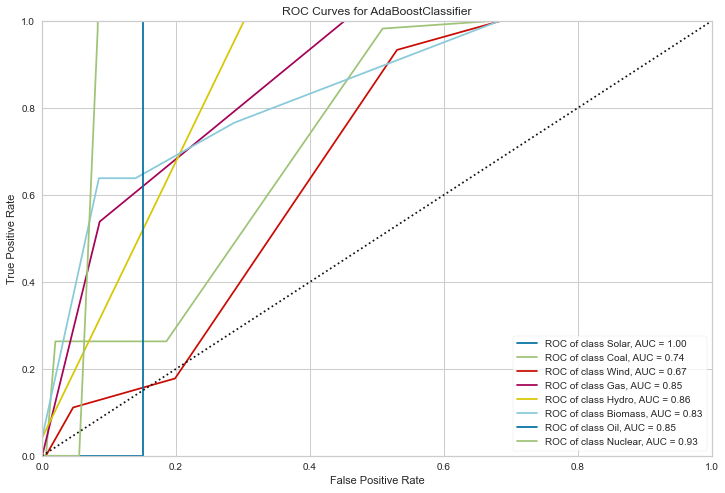

MODEL LEARNING CURVE


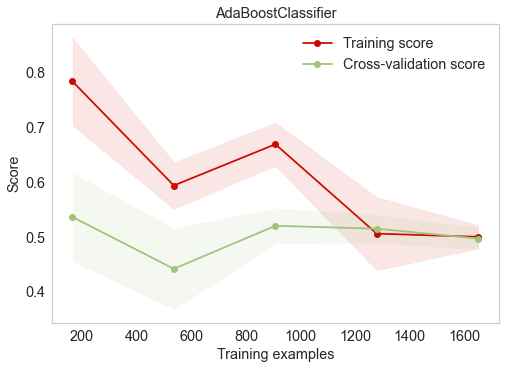

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.9878934624697336
SCORE 0.9878934624697336
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  1 50  1  0  0  0]
 [ 0  0  0  1 46  1  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        57
         2.0       0.98      1.00      0.99        45
         3.0       0.96      0.96      0.96        52
         4.0       0.98      0.96      0.97        48
         5.0       0.98      0.98      0.98        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted av

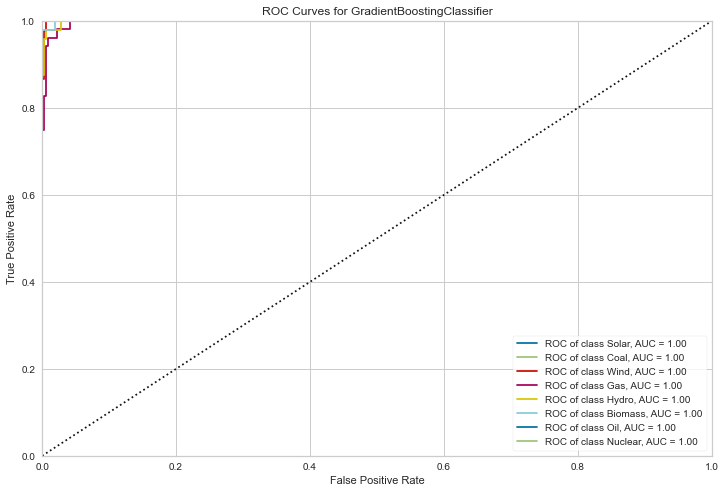

MODEL LEARNING CURVE


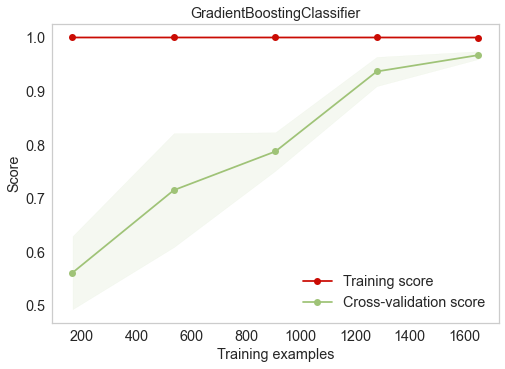

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.9612590799031477
SCORE 0.9612590799031477
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 53  4  0  0  0  0  0]
 [ 0  0 42  0  1  2  0  0]
 [ 0  0  4 46  1  1  0  0]
 [ 0  0  0  1 47  0  0  0]
 [ 0  0  0  1  1 45  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      0.93      0.96        57
         2.0       0.84      0.93      0.88        45
         3.0       0.96      0.88      0.92        52
         4.0       0.94      0.98      0.96        48
         5.0       0.94      0.96      0.95        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg   

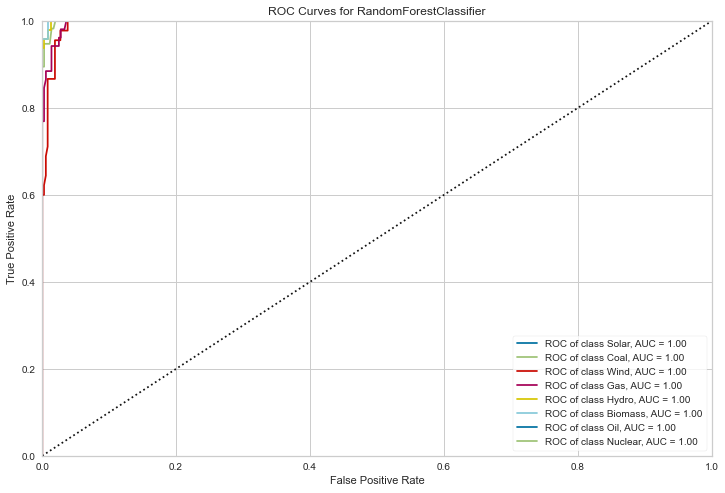

MODEL LEARNING CURVE


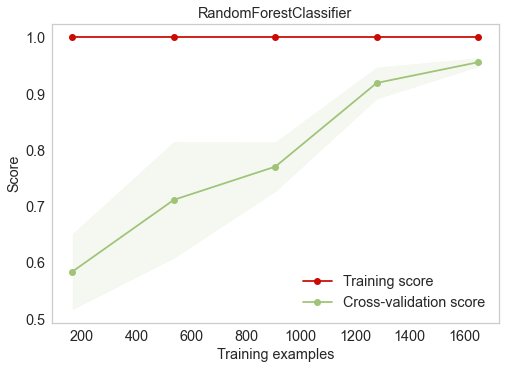

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.9661016949152542
SCORE 0.9661016949152542
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  2 40  1  0  1  0  1]
 [ 0  1  2 47  2  0  0  0]
 [ 0  0  0  1 46  1  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  1 50]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.95      1.00      0.97        57
         2.0       0.95      0.89      0.92        45
         3.0       0.94      0.90      0.92        52
         4.0       0.96      0.96      0.96        48
         5.0       0.96      0.98      0.97        47
         6.0       0.98      1.00      0.99        60
         7.0       0.98      0.98      0.98        51

    accuracy                           0.97       413
   macro avg       0.97      0.96      0.96       413
weighted avg   

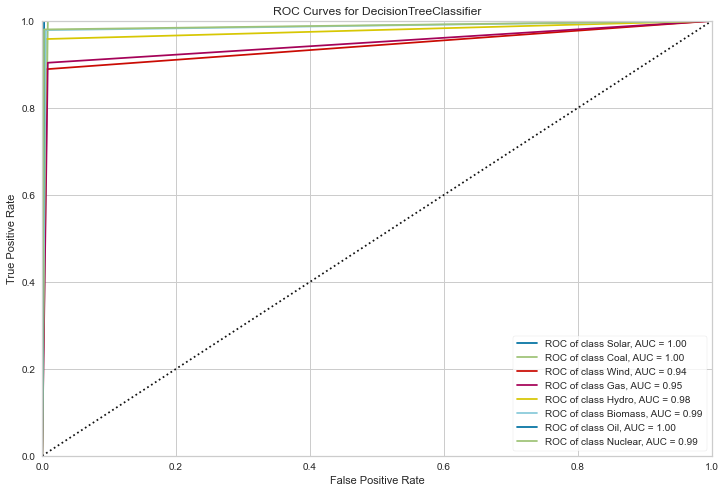

MODEL LEARNING CURVE


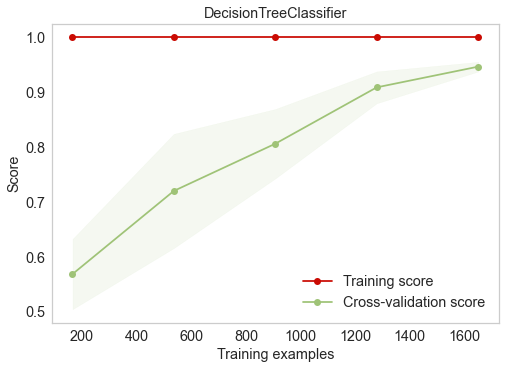

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8765133171912833
SCORE 0.8765133171912833
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 47  8  2  0  0  0  0]
 [ 0  4 32  4  3  2  0  0]
 [ 0  1  3 36  2 10  0  0]
 [ 0  0  3  0 45  0  0  0]
 [ 0  0  0  2  1 43  0  1]
 [ 0  0  0  0  0  0 59  1]
 [ 0  0  0  0  0  4  0 47]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.90      0.82      0.86        57
         2.0       0.70      0.71      0.70        45
         3.0       0.82      0.69      0.75        52
         4.0       0.88      0.94      0.91        48
         5.0       0.73      0.91      0.81        47
         6.0       1.00      0.98      0.99        60
         7.0       0.96      0.92      0.94        51

    accuracy                           0.88       413
   macro avg       0.87      0.87      0.87       413
weighted avg  

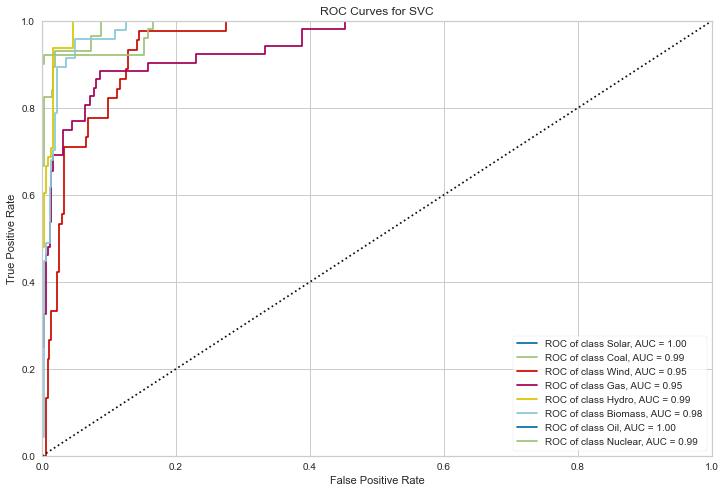

MODEL LEARNING CURVE


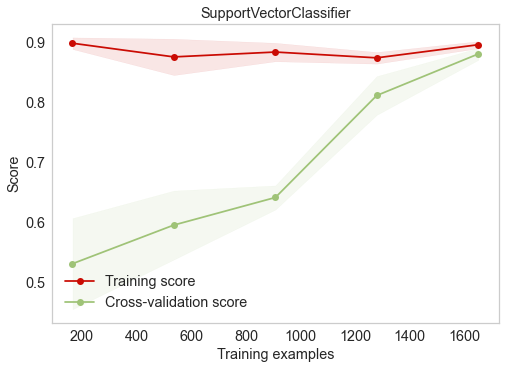

In [106]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [107]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_csv

,Models,Accuracy Score,Cross_val_score
0,AdaBoostClassifier,0.569007,49.660429
1,GradientBoostingClassifier,0.987893,96.657303
2,RandomForestClassifier,0.961259,95.833706
3,DecisionTreeClassifier,0.966102,94.574038
4,SupportVectorClassifier,0.876513,88.032276


## We will be selecting Gradient Boosting Classifier as it is giving us cross_val_Score of 0.96 and good metrics of  model.

## Hyperparameter tuning our best ML model:

In [108]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [109]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [110]:
param_class={
 'max_depth': [6,5,7],
 'criterion':['friedman_mse', 'squared_error', 'mse'],
 'subsample': [1,2,3],
 'verbose': [None,0,1,2]}

In [111]:
Grid_classifier=GridSearchCV(estimator=gbc,param_grid=param_class,cv=5)

In [112]:
Grid_classifier.fit(x_new,y_new)

      Iter       Train Loss   Remaining Time 
         1           1.5125            4.64s
         2           1.2178            6.12s
         3           1.0101            6.69s
         4           0.8537            6.94s
         5           0.7318            7.28s
         6           0.6309            7.39s
         7           0.5442            7.41s
         8           0.4722            7.32s
         9           0.4050            7.36s
        10           0.3488            7.33s
        20           0.0916            6.66s
        30           0.0325            5.80s
        40           0.0127            4.99s
        50           0.0054            4.14s
        60           0.0023            3.34s
        70           0.0010            2.50s
        80           0.0005            1.67s
        90           0.0002            0.83s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            4.64s
        

        84           0.0004            1.37s
        85           0.0003            1.28s
        86           0.0003            1.20s
        87           0.0003            1.11s
        88           0.0003            1.03s
        89           0.0003            0.94s
        90           0.0002            0.86s
        91           0.0002            0.77s
        92           0.0002            0.68s
        93           0.0002            0.60s
        94           0.0002            0.51s
        95           0.0002            0.43s
        96           0.0002            0.34s
        97           0.0001            0.26s
        98           0.0001            0.17s
        99           0.0001            0.09s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            4.64s
         2           1.2165            6.78s
         3           1.0060            6.78s
         4           0.8456            7.28s
         

        67           0.0014            2.84s
        68           0.0013            2.76s
        69           0.0012            2.67s
        70           0.0011            2.59s
        71           0.0010            2.50s
        72           0.0009            2.41s
        73           0.0009            2.33s
        74           0.0008            2.24s
        75           0.0007            2.15s
        76           0.0007            2.07s
        77           0.0006            1.98s
        78           0.0006            1.89s
        79           0.0005            1.81s
        80           0.0005            1.72s
        81           0.0005            1.64s
        82           0.0004            1.55s
        83           0.0004            1.46s
        84           0.0004            1.38s
        85           0.0004            1.29s
        86           0.0003            1.20s
        87           0.0003            1.12s
        88           0.0003            1.03s
        89

        50           0.0051            4.18s
        51           0.0047            4.09s
        52           0.0043            4.00s
        53           0.0040            3.93s
        54           0.0037            3.85s
        55           0.0034            3.76s
        56           0.0032            3.68s
        57           0.0029            3.59s
        58           0.0027            3.50s
        59           0.0025            3.43s
        60           0.0024            3.34s
        61           0.0022            3.26s
        62           0.0020            3.18s
        63           0.0019            3.09s
        64           0.0017            3.01s
        65           0.0016            2.93s
        66           0.0015            2.85s
        67           0.0014            2.76s
        68           0.0013            2.68s
        69           0.0012            2.60s
        70           0.0011            2.51s
        71           0.0011            2.43s
        72

        33           0.0488            4.58s
        34           0.0454            4.50s
        35           0.0422            4.42s
        36           0.0394            4.37s
        37           0.0368            4.31s
        38           0.0346            4.24s
        39           0.0327            4.17s
        40           0.0303            4.10s
        41           0.0280            4.03s
        42           0.0263            3.97s
        43           0.0245            3.89s
        44           0.0229            3.83s
        45           0.0215            3.76s
        46           0.0200            3.69s
        47           0.0187            3.62s
        48           0.0176            3.55s
        49           0.0164            3.48s
        50           0.0155            3.41s
        51           0.0145            3.34s
        52           0.0136            3.28s
        53           0.0128            3.20s
        54           0.0121            3.13s
        55

        15           0.2440            5.85s
        16           0.2200            5.77s
        17           0.1997            5.67s
        18           0.1826            5.57s
        19           0.1657            5.53s
        20           0.1504            5.44s
        21           0.1370            5.35s
        22           0.1257            5.27s
        23           0.1150            5.25s
        24           0.1056            5.14s
        25           0.0968            5.11s
        26           0.0891            5.02s
        27           0.0823            4.97s
        28           0.0761            4.89s
        29           0.0703            4.81s
        30           0.0647            4.73s
        31           0.0601            4.69s
        32           0.0553            4.63s
        33           0.0512            4.55s
        34           0.0470            4.50s
        35           0.0435            4.44s
        36           0.0407            4.36s
        37

        97           0.0011            0.20s
        98           0.0011            0.14s
        99           0.0010            0.07s
       100           0.0009            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5651            4.75s
         2           1.2683            5.06s
         3           1.0668            5.73s
         4           0.9093            6.08s
         5           0.7834            5.87s
         6           0.6807            6.00s
         7           0.5926            6.05s
         8           0.5229            5.96s
         9           0.4588            5.87s
        10           0.4066            5.88s
        11           0.3634            5.73s
        12           0.3250            5.77s
        13           0.2914            5.68s
        14           0.2628            5.69s
        15           0.2365            5.59s
        16           0.2152            5.51s
        17           0.1939            5.43s
        1

        80           0.0001            2.03s
        90           0.0000            1.02s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4887            4.64s
         2           1.1702            6.89s
         3           0.9524            8.01s
         4           0.7870            8.57s
         5           0.6538            8.63s
         6           0.5496            8.74s
         7           0.4638            8.91s
         8           0.3932            8.90s
         9           0.3362            8.88s
        10           0.2887            8.84s
        20           0.0689            7.98s
        30           0.0176            6.97s
        40           0.0057            5.96s
        50           0.0020            5.00s
        60           0.0007            4.00s
        70           0.0003            3.00s
        80           0.0001            2.00s
        90           0.0000            1.00s
       10

        59           0.0007            4.44s
        60           0.0006            4.34s
        61           0.0005            4.23s
        62           0.0005            4.11s
        63           0.0004            4.01s
        64           0.0004            3.90s
        65           0.0003            3.79s
        66           0.0003            3.69s
        67           0.0003            3.58s
        68           0.0003            3.48s
        69           0.0002            3.37s
        70           0.0002            3.26s
        71           0.0002            3.16s
        72           0.0002            3.06s
        73           0.0002            2.95s
        74           0.0001            2.86s
        75           0.0001            2.75s
        76           0.0001            2.64s
        77           0.0001            2.53s
        78           0.0001            2.42s
        79           0.0001            2.31s
        80           0.0001            2.20s
        81

        41           0.0051            6.63s
        42           0.0047            6.50s
        43           0.0042            6.37s
        44           0.0038            6.26s
        45           0.0034            6.14s
        46           0.0031            6.02s
        47           0.0028            5.90s
        48           0.0025            5.78s
        49           0.0023            5.67s
        50           0.0021            5.55s
        51           0.0019            5.44s
        52           0.0017            5.32s
        53           0.0015            5.19s
        54           0.0014            5.10s
        55           0.0013            4.97s
        56           0.0011            4.85s
        57           0.0010            4.75s
        58           0.0009            4.63s
        59           0.0008            4.51s
        60           0.0008            4.40s
        61           0.0007            4.29s
        62           0.0006            4.18s
        63

         3           1.0060            7.54s
         4           0.8456            7.69s
         5           0.7204            7.57s
         6           0.6209            7.66s
         7           0.5367            7.72s
         8           0.4642            7.59s
         9           0.4038            7.59s
        10           0.3485            7.48s
        20           0.0926            6.78s
        30           0.0298            6.04s
        40           0.0114            5.17s
        50           0.0051            4.29s
        60           0.0022            3.41s
        70           0.0010            2.55s
        80           0.0005            1.69s
        90           0.0002            0.84s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5339            6.98s
         2           1.2309            6.97s
         3           1.0145            7.77s
         4           0.8533            7.66s
         

         5           0.7204            7.50s
         6           0.6210            7.42s
         7           0.5367            7.33s
         8           0.4642            7.48s
         9           0.4038            7.38s
        10           0.3485            7.27s
        11           0.3042            7.34s
        12           0.2630            7.22s
        13           0.2289            7.11s
        14           0.1996            7.15s
        15           0.1746            7.05s
        16           0.1534            6.94s
        17           0.1348            6.93s
        18           0.1184            6.83s
        19           0.1043            6.72s
        20           0.0927            6.68s
        21           0.0820            6.60s
        22           0.0729            6.53s
        23           0.0645            6.47s
        24           0.0572            6.37s
        25           0.0512            6.27s
        26           0.0457            6.23s
        27

        88           0.0003            1.03s
        89           0.0002            0.95s
        90           0.0002            0.86s
        91           0.0002            0.77s
        92           0.0002            0.69s
        93           0.0002            0.60s
        94           0.0002            0.52s
        95           0.0002            0.43s
        96           0.0001            0.34s
        97           0.0001            0.26s
        98           0.0001            0.17s
        99           0.0001            0.09s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5099            5.45s
         2           1.2107            6.52s
         3           0.9984            7.22s
         4           0.8352            7.45s
         5           0.7032            7.38s
         6           0.5996            7.59s
         7           0.5141            7.51s
         8           0.4456            7.39s
         

        71           0.0010            2.49s
        72           0.0010            2.40s
        73           0.0009            2.32s
        74           0.0008            2.23s
        75           0.0008            2.15s
        76           0.0007            2.06s
        77           0.0007            1.97s
        78           0.0006            1.89s
        79           0.0006            1.80s
        80           0.0005            1.72s
        81           0.0005            1.63s
        82           0.0005            1.54s
        83           0.0004            1.46s
        84           0.0004            1.37s
        85           0.0004            1.28s
        86           0.0004            1.20s
        87           0.0003            1.11s
        88           0.0003            1.03s
        89           0.0003            0.94s
        90           0.0003            0.86s
        91           0.0003            0.77s
        92           0.0002            0.68s
        93

        52           0.0136            3.16s
        53           0.0128            3.09s
        54           0.0121            3.02s
        55           0.0114            2.97s
        56           0.0108            2.90s
        57           0.0102            2.84s
        58           0.0095            2.78s
        59           0.0089            2.71s
        60           0.0083            2.64s
        61           0.0079            2.58s
        62           0.0074            2.51s
        63           0.0070            2.45s
        64           0.0067            2.38s
        65           0.0063            2.31s
        66           0.0059            2.25s
        67           0.0057            2.18s
        68           0.0054            2.11s
        69           0.0051            2.06s
        70           0.0048            1.98s
        71           0.0046            1.92s
        72           0.0044            1.86s
        73           0.0041            1.79s
        74

        35           0.0435            4.25s
        36           0.0407            4.18s
        37           0.0376            4.13s
        38           0.0350            4.07s
        39           0.0326            3.99s
        40           0.0303            3.95s
        41           0.0282            3.88s
        42           0.0261            3.80s
        43           0.0245            3.75s
        44           0.0229            3.67s
        45           0.0216            3.61s
        46           0.0201            3.55s
        47           0.0190            3.49s
        48           0.0178            3.42s
        49           0.0166            3.35s
        50           0.0155            3.28s
        51           0.0145            3.23s
        52           0.0137            3.16s
        53           0.0128            3.09s
        54           0.0121            3.02s
        55           0.0114            2.97s
        56           0.0107            2.89s
        57

        16           0.2125            5.36s
        17           0.1920            5.29s
        18           0.1748            5.22s
        19           0.1567            5.24s
        20           0.1426            5.20s
        21           0.1307            5.18s
        22           0.1181            5.09s
        23           0.1082            5.01s
        24           0.0988            4.99s
        25           0.0899            4.93s
        26           0.0826            4.83s
        27           0.0761            4.76s
        28           0.0703            4.73s
        29           0.0651            4.65s
        30           0.0600            4.58s
        31           0.0556            4.51s
        32           0.0517            4.44s
        33           0.0480            4.39s
        34           0.0443            4.32s
        35           0.0413            4.25s
        36           0.0385            4.18s
        37           0.0359            4.12s
        38

        80           0.0001            2.58s
        90           0.0000            1.26s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4838            6.33s
         2           1.1737            9.80s
         3           0.9583           10.09s
         4           0.7991           10.37s
         5           0.6744           10.64s
         6           0.5739           10.90s
         7           0.4909           10.84s
         8           0.4211           10.95s
         9           0.3635           10.68s
        10           0.3157           10.44s
        11           0.2726           10.23s
        12           0.2376           10.27s
        13           0.2025           10.17s
        14           0.1742           10.08s
        15           0.1502            9.98s
        16           0.1289            9.87s
        17           0.1114            9.81s
        18           0.0966            9.81s
        1

        79           0.0001            2.31s
        80           0.0001            2.20s
        81           0.0001            2.09s
        82           0.0001            1.98s
        83           0.0001            1.86s
        84           0.0001            1.75s
        85           0.0001            1.65s
        86           0.0000            1.54s
        87           0.0000            1.42s
        88           0.0000            1.32s
        89           0.0000            1.21s
        90           0.0000            1.10s
        91           0.0000            0.99s
        92           0.0000            0.88s
        93           0.0000            0.77s
        94           0.0000            0.66s
        95           0.0000            0.55s
        96           0.0000            0.44s
        97           0.0000            0.33s
        98           0.0000            0.22s
        99           0.0000            0.11s
       100           0.0000            0.00s
      Iter

        62           0.0006            4.22s
        63           0.0006            4.11s
        64           0.0005            4.00s
        65           0.0005            3.89s
        66           0.0004            3.78s
        67           0.0004            3.66s
        68           0.0003            3.54s
        69           0.0003            3.43s
        70           0.0003            3.32s
        71           0.0003            3.21s
        72           0.0002            3.09s
        73           0.0002            2.98s
        74           0.0002            2.87s
        75           0.0002            2.76s
        76           0.0002            2.65s
        77           0.0002            2.54s
        78           0.0001            2.42s
        79           0.0001            2.31s
        80           0.0001            2.20s
        81           0.0001            2.09s
        82           0.0001            1.98s
        83           0.0001            1.87s
        84

         2           1.2309            8.62s
         3           1.0145            9.31s
         4           0.8533            9.41s
         5           0.7278            8.97s
         6           0.6242            8.77s
         7           0.5356            9.46s
         8           0.4629            9.38s
         9           0.4027            9.30s
        10           0.3480            9.14s
        20           0.0942            8.16s
        30           0.0319            7.19s
        40           0.0129            5.98s
        50           0.0056            4.86s
        60           0.0024            3.84s
        70           0.0010            2.84s
        80           0.0005            1.89s
        90           0.0002            0.94s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5099            6.33s
         2           1.2107            7.06s
         3           0.9984            7.50s
         

        24           0.0572            7.07s
        25           0.0512            6.96s
        26           0.0457            6.83s
        27           0.0411            6.81s
        28           0.0366            6.75s
        29           0.0333            6.64s
        30           0.0301            6.66s
        31           0.0272            6.55s
        32           0.0250            6.44s
        33           0.0228            6.35s
        34           0.0208            6.27s
        35           0.0188            6.15s
        36           0.0171            6.12s
        37           0.0156            6.02s
        38           0.0143            5.90s
        39           0.0131            5.81s
        40           0.0120            5.75s
        41           0.0109            5.64s
        42           0.0100            5.53s
        43           0.0092            5.44s
        44           0.0084            5.36s
        45           0.0077            5.29s
        46

         6           0.5996            9.27s
         7           0.5141            9.35s
         8           0.4456            9.11s
         9           0.3843            9.30s
        10           0.3316            9.00s
        11           0.2883            8.74s
        12           0.2502            8.62s
        13           0.2182            8.67s
        14           0.1902            8.45s
        15           0.1659            8.30s
        16           0.1452            8.11s
        17           0.1292            7.97s
        18           0.1147            7.87s
        19           0.1011            7.71s
        20           0.0897            7.58s
        21           0.0798            7.52s
        22           0.0714            7.43s
        23           0.0643            7.28s
        24           0.0573            7.14s
        25           0.0516            7.01s
        26           0.0465            6.90s
        27           0.0419            6.77s
        28

        88           0.0003            1.17s
        89           0.0003            1.07s
        90           0.0003            0.97s
        91           0.0003            0.88s
        92           0.0002            0.78s
        93           0.0002            0.69s
        94           0.0002            0.59s
        95           0.0002            0.49s
        96           0.0002            0.39s
        97           0.0002            0.29s
        98           0.0002            0.20s
        99           0.0002            0.10s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5589            4.75s
         2           1.2736            5.49s
         3           1.0761            6.72s
         4           0.9186            7.30s
         5           0.7949            7.14s
         6           0.6940            6.89s
         7           0.6131            6.70s
         8           0.5363            6.72s
         

        69           0.0051            2.35s
        70           0.0048            2.27s
        71           0.0046            2.19s
        72           0.0044            2.12s
        73           0.0041            2.06s
        74           0.0039            1.98s
        75           0.0037            1.90s
        76           0.0035            1.82s
        77           0.0033            1.75s
        78           0.0031            1.67s
        79           0.0029            1.60s
        80           0.0027            1.53s
        81           0.0026            1.45s
        82           0.0025            1.37s
        83           0.0023            1.29s
        84           0.0022            1.22s
        85           0.0021            1.14s
        86           0.0020            1.06s
        87           0.0019            0.99s
        88           0.0017            0.91s
        89           0.0017            0.83s
        90           0.0016            0.76s
        91

        50           0.0150            3.84s
        51           0.0139            3.77s
        52           0.0130            3.68s
        53           0.0122            3.60s
        54           0.0113            3.54s
        55           0.0106            3.45s
        56           0.0099            3.39s
        57           0.0094            3.32s
        58           0.0089            3.29s
        59           0.0083            3.23s
        60           0.0078            3.14s
        61           0.0074            3.05s
        62           0.0070            2.97s
        63           0.0065            2.90s
        64           0.0062            2.82s
        65           0.0059            2.74s
        66           0.0055            2.66s
        67           0.0052            2.59s
        68           0.0049            2.50s
        69           0.0046            2.42s
        70           0.0044            2.33s
        71           0.0041            2.26s
        72

        32           0.0502            5.25s
        33           0.0467            5.16s
        34           0.0436            5.06s
        35           0.0407            4.96s
        36           0.0379            4.88s
        37           0.0353            4.79s
        38           0.0327            4.74s
        39           0.0305            4.75s
        40           0.0287            4.66s
        41           0.0270            4.57s
        42           0.0253            4.47s
        43           0.0237            4.38s
        44           0.0222            4.33s
        45           0.0208            4.27s
        46           0.0196            4.21s
        47           0.0185            4.12s
        48           0.0173            4.03s
        49           0.0163            3.94s
        50           0.0152            3.86s
        51           0.0143            3.78s
        52           0.0133            3.71s
        53           0.0126            3.62s
        54

        14           0.1742            9.93s
        15           0.1502            9.84s
        16           0.1289            9.70s
        17           0.1114            9.72s
        18           0.0966            9.58s
        19           0.0842            9.51s
        20           0.0733            9.38s
        21           0.0645            9.27s
        22           0.0560            9.13s
        23           0.0488            9.05s
        24           0.0427            8.89s
        25           0.0379            8.78s
        26           0.0329            8.72s
        27           0.0288            8.74s
        28           0.0251            8.66s
        29           0.0221            8.54s
        30           0.0193            8.42s
        31           0.0172            8.28s
        32           0.0152            8.14s
        33           0.0133            8.04s
        34           0.0117            7.90s
        35           0.0103            7.77s
        36

        96           0.0000            0.47s
        97           0.0000            0.35s
        98           0.0000            0.23s
        99           0.0000            0.12s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4967            7.13s
         2           1.1841            9.41s
         3           0.9706            9.83s
         4           0.8083           10.37s
         5           0.6778           10.34s
         6           0.5704           10.53s
         7           0.4846           10.31s
         8           0.4136           10.21s
         9           0.3533            9.95s
        10           0.3032            9.94s
        11           0.2621            9.77s
        12           0.2266            9.62s
        13           0.1955            9.53s
        14           0.1694            9.34s
        15           0.1454            9.25s
        16           0.1256            9.16s
        1

        77           0.0002            2.64s
        78           0.0001            2.53s
        79           0.0001            2.42s
        80           0.0001            2.30s
        81           0.0001            2.19s
        82           0.0001            2.08s
        83           0.0001            1.96s
        84           0.0001            1.85s
        85           0.0001            1.73s
        86           0.0001            1.62s
        87           0.0001            1.50s
        88           0.0001            1.38s
        89           0.0000            1.26s
        90           0.0000            1.15s
        91           0.0000            1.04s
        92           0.0000            0.92s
        93           0.0000            0.81s
        94           0.0000            0.69s
        95           0.0000            0.58s
        96           0.0000            0.46s
        97           0.0000            0.35s
        98           0.0000            0.23s
        99

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': [6, 5, 7], 'subsample': [1, 2, 3],
                         'verbose': [None, 0, 1, 2]})

In [113]:
Grid_classifier.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'subsample': 1, 'verbose': 0}

In [114]:
Grid_classifier.best_score_

0.9782023554855543

## Final Model Learning Curve:

In [115]:
gbc=GradientBoostingClassifier(
 criterion= 'squared_error',
 max_depth= 5,
 subsample= 1,
 verbose= 0)

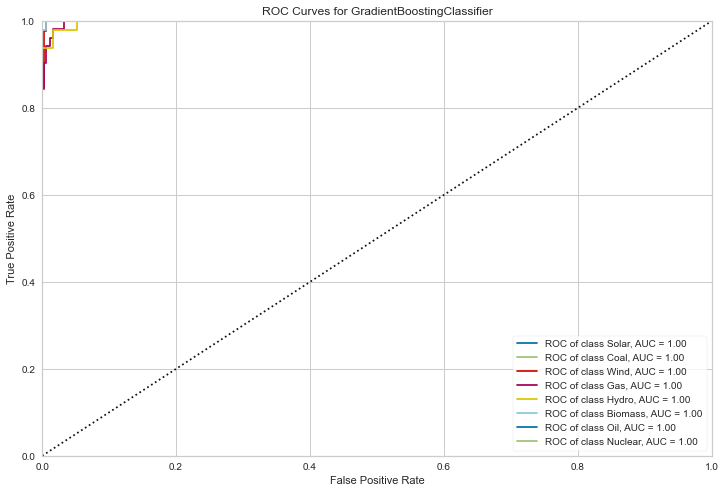

MODEL LEARNING CURVE


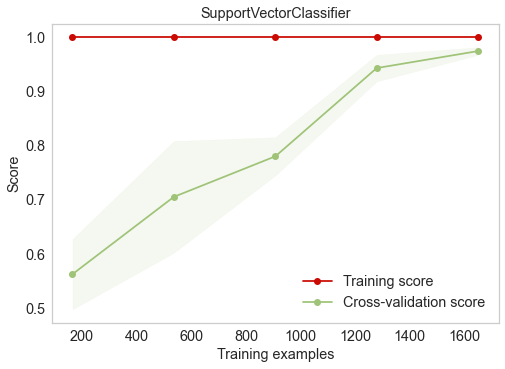

In [116]:
plt.figure(figsize=(12,8))
roc_auc(gbc,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(gbc,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

## Final Model Metrics:

In [117]:
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred_gbc))
print("Confusion Matrics")
print(confusion_matrix(y_test,pred_gbc))
print("Classification Report")
print(classification_report(y_test,pred_gbc))

Accuracy_score 0.9806295399515739
Confusion Matrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  2 48  2  0  0  0]
 [ 0  0  0  2 45  1  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        57
         2.0       0.96      1.00      0.98        45
         3.0       0.94      0.92      0.93        52
         4.0       0.96      0.94      0.95        48
         5.0       0.98      0.98      0.98        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.98       413
   macro avg       0.98      0.98      0.98       413
weighted avg       0.98      0.98      0.98       413



## The Accuracy score of final classification model is 98.06%

## Saving the model:

In [118]:
joblib.dump(Grid_classifier,"Classification_Model_GPP.obj")

['Classification_Model_GPP.obj']

## Loading the model:

In [119]:
model=joblib.load('Classification_Model_GPP.obj')

In [120]:
model.predict(x_test)

array([7., 6., 0., 4., 5., 6., 1., 6., 0., 0., 4., 5., 0., 4., 1., 6., 2.,
       6., 4., 4., 7., 7., 5., 1., 1., 1., 5., 3., 1., 6., 1., 4., 2., 3.,
       1., 3., 5., 7., 1., 3., 7., 1., 4., 1., 3., 3., 0., 5., 2., 5., 1.,
       4., 3., 4., 0., 6., 1., 1., 6., 0., 5., 0., 4., 0., 5., 1., 1., 4.,
       5., 1., 2., 6., 6., 3., 6., 6., 4., 0., 2., 2., 4., 1., 1., 7., 4.,
       7., 0., 4., 7., 6., 5., 6., 1., 4., 3., 1., 1., 2., 7., 2., 1., 1.,
       5., 0., 1., 6., 1., 7., 7., 2., 1., 7., 4., 7., 0., 6., 6., 1., 2.,
       0., 0., 2., 2., 2., 3., 3., 5., 1., 5., 3., 6., 5., 6., 5., 4., 2.,
       4., 3., 4., 1., 7., 3., 6., 6., 4., 1., 1., 2., 3., 1., 2., 4., 2.,
       7., 7., 3., 0., 0., 3., 0., 5., 4., 7., 0., 7., 7., 4., 1., 4., 5.,
       7., 0., 6., 2., 0., 3., 4., 7., 2., 0., 7., 6., 5., 1., 5., 7., 3.,
       6., 4., 2., 3., 2., 5., 6., 5., 6., 1., 3., 3., 1., 3., 4., 4., 2.,
       6., 1., 2., 3., 0., 0., 3., 0., 5., 7., 7., 3., 4., 2., 3., 4., 7.,
       4., 6., 2., 1., 0.

## Conclusion

1. In this model analysis, we build two models- (a) which can predict capacity_mw and (b) which can predict primary_fuel.

2. For the capacity_mw model, we did lot of EDA to understand the importnace of feature over target column.

3. There is longitude and latitude given in the dataset so with the help of it we extracted the city and state name and did EDA on them too.

4. We did feature engineering later where we added some columns like city and state and also added a column which shows for a particular fuel type how much capacity_mw was required.

5. We build a Regression model for the target column 'capacity_mw' and as RandomForestRegressor gave good accuracy and good metrics score so we chose it as our final model.

6. We did not removed outliers while building the regression model because all the columns were categorical and no continuous column was present.

7. For building the second model i.e., classification model, we used upsampling SMOTE as it doesn't paste the sample again and again but it does sampling synthetically.

8. Later we applied classifier algorithms and found that GradientBoostingClassifier was giving good metrics as compared to other classifiers so we proceeded with GradientBoostingClassifier to build our final classification model.

9. While building classification model, we removed outliers because there was some continous columns and we used zscore method to remove outliers.